##Sentiment Analysis for Drug Effectiveness, Satisfaction and Side Effects Using Natural Language Processing (NLP) and Deep Learning Methods

##Abstract

In this project, we develop and assess sentiment analysis models employing both traditional Natural Language Processing (NLP) and deep learning methodologies to enhance the identification of sentiments associated with drug effectiveness, satisfaction and side effects across different sources. Sentiment analysis, a critical task in NLP, is employed to understand emotional distinctions in textual data, thereby uncovering attitudes, opinions, and emotions.

We incorporate data from two primary sources: the Drugs.com Reviews Dataset and the WebMD Drug Reviews Dataset, both of which are openly available through kaggle. We discern and classify sentiments pertaining to drug effectiveness, satisfaction and side effects from textual reviews using traditional NLP methods with promising results.

Leveraging TensorFlow, a deep learning framework, and advanced neural networks using Recurrent Neural Network (RNN) Gated Recurrent Network (GRU) and Long Short Term Memory (LSTM), our deep learning models exhibit promising performance, demonstrating scalability and efficiency in handling substantial amounts of data without compromising accuracy, thus facilitating potential large-scale deployment.

We analyze the models for Cross-data adaptability and the results are also promising as it's key to establish a sentiment analysis model that is not only effective but also generalizable across various medical conditions and drug types. This analysis could help organizations better understand customer sentiment and influence informed decision-making in healthcare.

##Team


**Jimmy Zhang**

**Interests**: Advanced Manufacturing, IoT, Robotics, Embedded Systems, HPC, Data Science

**Background**: Jimmy studied chemical engineering in college and is currently a Manufacturing Automation Engineer at Merck & Co. A vaccine manufacturing is highly regulated, producing immense amounts of data across various record keeping and data acquisition systems. However, the data generated in vaccine manufacturing is often not used or consumed for analysis. At Drexel, Jimmy seeks to gain a versatile data science toolset to address this data chaos.

**Shawn Oyer**

**Interests:** Geographic Information Systems (GIS), Data Science, Remote Sensing, Quality Control.

**Background:** Shawn has an undergraduate degree in Geography and Spanish from the University of New Mexico, in addition to a Masters in Applied Geography from New Mexico State University. He currently works as a geospatial data steward/manager with the National Geospatial-Intelligence Agency (NGA), within the DoD, mainly with geospatial and satellite imagery data. He has a solid background in the following skills/domains: Python, SQL, Geographic Information Systems (GIS), data collection, data pre-processing, data analysis, and quality control.

**Thu Tran**

**Interests:** Chemical engineering, chemical manufacture technology, process automation, data visualization

**Background:** Thu graduated as BS of chemical engineering and will graduate MS of data science this year. When Working as a manufacturing technology engineer at Dupont at Dupont, she saw the important role of data. Thu always uses data as evidenced in root cause analysis, as the parameter in control of  automation process, in addition to as a metric in continuous improvement.

##Introduction and Background

We selected Gräßer et al's paper, "Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning," because it explores the use of sentiment analysis on pharmaceutical reviews to evaluate drug effectiveness. It explores the utility of machine learning techniques for handling sparse datasets and applying cross-domain and cross-data knowledge to improve the accuracy and applicability of sentiment models in healthcare. In our research, our project goal is to construct similar methodologies as the paper using traditional Natural Language Processing (NLP) techniques, however, we also incorporate deep learning neural network models to enhance the identification of sentiments associated with drug effectiveness, satisfaction and side effects across different sources.

This research impacts the greater NLP research community in that we run experiments two different ways in an attempt to create a model that can identify and predict in-domain and cross-data sentiment analysis on drug reviews. Many research studies have attempted to improve domain adaptation or cross-data sentiment classification on products, movies, restaurants, etc but not many on drug review aspect-levels such as benefits, side effects and overall rating of the drugs.

Sentiment analysis is a common NLP task used to determine the emotional tone behind words. It is used to understand the attitudes, opinions, and emotions expressed in written text. This technique is commonly applied in business analytics to analyze customer reviews, survey responses, and social media conversations to gauge public opinion about products, services, or topics. By categorizing text as positive, negative, or neutral, sentiment analysis helps organizations understand customer sentiment and can influence decision-making. Our sentiment analysis model may help lay the foundation for a useful downstream stance detection system for the healthcare domain.

We aim to significantly improve the accuracy of sentiment predictions compared to traditional machine learning models. By leveraging TensorFlow, a widely available deep learning module, we aim to ensure that our model can demonstrate scalability and efficiency in handling substantial amounts of data without compromising accuracy, thus facilitating potential large-scale deployment.

## Project Data

The data we chose to incorporate in the project are contained within two data sources.

WebMD Drug Reviews Dataset (https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset)

Data was acquired from scraping WebMD (https://www.webmd.com/drugs/2/index) and compiled into a .csv (Comma-separated values) containing 362,806 rows x 12 columns.
The dataset provides user reviews on specific drugs along with related conditions, side effects, age, sex, and ratings reflecting overall patient satisfaction

Description of Attribution:


*   Drug (categorical): name of drug
*   DrugId (numerical): drug id
*   Condition (categorical): name of condition
*   Reviews (text): patient review
*   Sides (text): side effects associated with drug (if any)
*   EaseOfUse (numerical): 5 star rating
*   Effectiveness (numerical): 5 star rating
*   Satisfaction (numerical): 5 star rating
*   Date (date): date of review entry
*   UsefulCount (numerical): number of users who found review useful
*   Age (numerical): age group range of user
*   Sex (categorical): gender of user

License:

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 1.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.
Drugs.com Reviews Dataset (https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com)

Data was acquired from crawling online pharmaceutical review sites such as Drugs.com (https://www.drugs.com/) and compiled into two .tsv (Tab-separated values) containing a total of 215,063 rows x 7 columns. They are partitioned by training (161,297, 75%) and testing (53,766, 25%) respectively.
The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.

Description of Attribution:

*   id (integer): drug id
*   DrugName (categorical): drug name
*   Condition (categorical): name of condition
*   Review (text): patient review
*   Rating (numerical): 10 star rating
*   Date (text): review date
*   UsefulCount (numerical): number of users who found review useful

License:

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

##Utilities

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
nbdir = "/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project"

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/DSCI\ 691\ Project\ and\ Assignments/Project/

/content/gdrive/.shortcut-targets-by-id/1_45gYawHdwJEsZ8fEVvc1QqQSAKL0L00/DSCI 691 Project and Assignments/Project


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
import string
import re
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pickle
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from keras.utils import plot_model
import matplotlib.image as mpimg
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter(action='ignore', category=FutureWarning)

##EDA and Pre-Processing

## Drugs.com

Drugs.com has a smaller dataset, divided into a training set (161,297 rows and 6 columns) and a test set (53,766 rows and 6 columns). Our data analysis revealed 4 categorical columns and 2 numerical columns. However, the dataset contains many missing data points. To clean the data, we removed all missing values, reducing the training set to 160,398 rows and the test set to 53,471 rows. Finally, we created a rating binary by reclassifying the rating column for binary classification.

In [ ]:
df_drugs_train = pd.read_csv('./data/drug+review+dataset+drugs+com/drugsComTrain_raw.tsv', sep='\t')
df_drugs_test = pd.read_csv('./data/drug+review+dataset+drugs+com/drugsComTest_raw.tsv', sep='\t')

df_drugs_train.head(5)

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [ ]:
df_drugs_test.head(5)

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [ ]:
print(df_drugs_train.shape)
print(df_drugs_test.shape)
print(df_drugs_train.info())
print(df_drugs_test.info())

(161297, 7)
(53766, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date  

In [ ]:
# Replacing empty values with NaN then removing them from the dataset, then reassigning index

print("\n Check for any null values in dataset:")
df_drugs_train = df_drugs_train.replace(r'^\s*$', np.nan, regex=True)
print(pd.isnull(df_drugs_train).sum())

print("\n Removing null values in dataset:")
df_drugs_train = df_drugs_train.dropna()
print(pd.isnull(df_drugs_train).sum())

print("\n Reassigning index")
df_drugs_train = df_drugs_train.reset_index(drop=True)

print("\n Check for any null values in dataset:")
df_drugs_test = df_drugs_test.replace(r'^\s*$', np.nan, regex=True)
print(pd.isnull(df_drugs_test).sum())

print("\n Removing null values in dataset:")
df_drugs_test = df_drugs_test.dropna()
print(pd.isnull(df_drugs_test).sum())

print("\n Reassigning index")
df_drugs_test = df_drugs_test.reset_index(drop=True)


 Check for any null values in dataset:
Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
clean_text       2
dtype: int64

 Removing null values in dataset:
Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
clean_text     0
dtype: int64

 Reassigning index

 Check for any null values in dataset:
Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
clean_text       2
dtype: int64

 Removing null values in dataset:
Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
clean_text     0
dtype: int64

 Reassigning index


In [ ]:
# Convert all object columns as strings as object dtype is not required
object_columns_train = list(df_drugs_train.select_dtypes(include='object').columns)
df_drugs_train[object_columns_train] = df_drugs_train[object_columns_train].astype('string')

# Determining numerical and categorical columns
numerical_df_train = df_drugs_train.select_dtypes(include=['number'])
numerical_columns_train = [col for col in df_drugs_train.columns if df_drugs_train[col].dtype.name == 'int64' or df_drugs_train[col].dtype.name == 'float64']
categorical_columns_df_train = df_drugs_train.select_dtypes(include=['string'])
categorical_columns_categorical_train = [col for col in df_drugs_train.columns if df_drugs_train[col].dtype.name == 'string']

print(categorical_columns_categorical_train, numerical_columns_train)

object_columns_test = list(df_drugs_test.select_dtypes(include='object').columns)
df_drugs_test[object_columns_test] = df_drugs_test[object_columns_test].astype('string')

# Determining numerical and categorical columns
numerical_df_test = df_drugs_test.select_dtypes(include=['number'])
numerical_columns_test = [col for col in df_drugs_test.columns if df_drugs_test[col].dtype.name == 'int64'or df_drugs_test[col].dtype.name == 'float64']
categorical_columns_df_test = df_drugs_test.select_dtypes(include=['string'])
categorical_columns_categorical_test = [col for col in df_drugs_test.columns if df_drugs_test[col].dtype.name == 'string']

print(categorical_columns_categorical_test, numerical_columns_test)

['drugName', 'condition', 'review', 'date', 'clean_text'] ['Unnamed: 0', 'rating', 'usefulCount']
['drugName', 'condition', 'review', 'date', 'clean_text'] ['Unnamed: 0', 'rating', 'usefulCount']


In [ ]:
print(df_drugs_train.info())
print(df_drugs_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160398 entries, 0 to 160397
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  string 
 2   condition    160398 non-null  string 
 3   review       160398 non-null  string 
 4   rating       160398 non-null  float64
 5   date         160398 non-null  string 
 6   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(2), string(4)
memory usage: 8.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53471 entries, 0 to 53470
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53471 non-null  int64  
 1   drugName     53471 non-null  string 
 2   condition    53471 non-null  string 
 3   review       53471 non-null  string 
 4   rating       53471 non-null  float64
 5   date         53471 non-null  s

In [ ]:
# Create new numerical column for reviews to do the binary classification

df_drugs_train['rating_binary'] = np.where(df_drugs_train['rating'] <= 4.0, 0,
                                           np.where(df_drugs_train['rating'] < 7.0, 1, 2))

df_drugs_train.drop('rating', axis=1, inplace=True)
print(df_drugs_train['rating_binary'].value_counts())

df_drugs_test['rating_binary'] = np.where(df_drugs_test['rating'] <= 4.0, 0,
                                           np.where(df_drugs_test['rating'] < 7.0, 1, 2))
df_drugs_test.drop('rating', axis=1, inplace=True)
print(df_drugs_test['rating_binary'].value_counts())

rating_binary
2    106308
0     39828
1     14260
Name: count, dtype: int64
rating_binary
2    35248
0    13428
1     4793
Name: count, dtype: int64


In [ ]:
df_drugs_train.head(5)

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  rating_binary  
0       May 20, 2012           27              2  
1     April 27, 2010          192              2  
2  December 14, 2009           17              1  
3   November 3, 2015           10              2  
4  November 27, 2016           37              2

In [ ]:
df_drugs_test.head(5)

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  rating_binary  
0   February 28, 2012           22              2  
1        May 17, 2009           17              2  
2  September 29, 2017            3              2  
3       March 5, 2017           35              2  
4    October 22, 2015            4              2

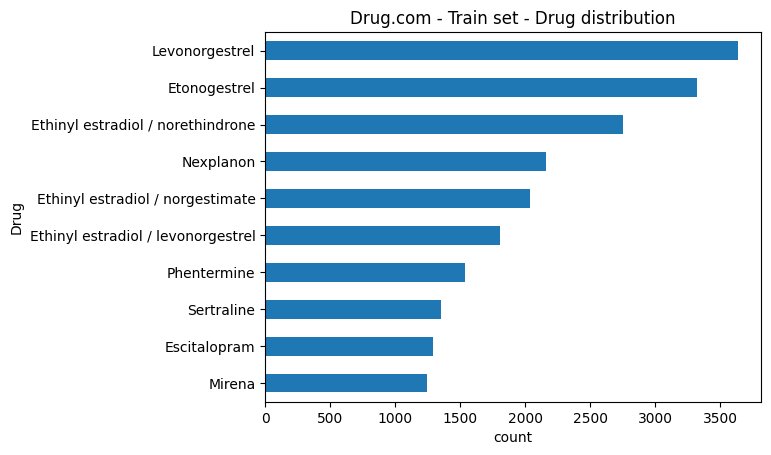

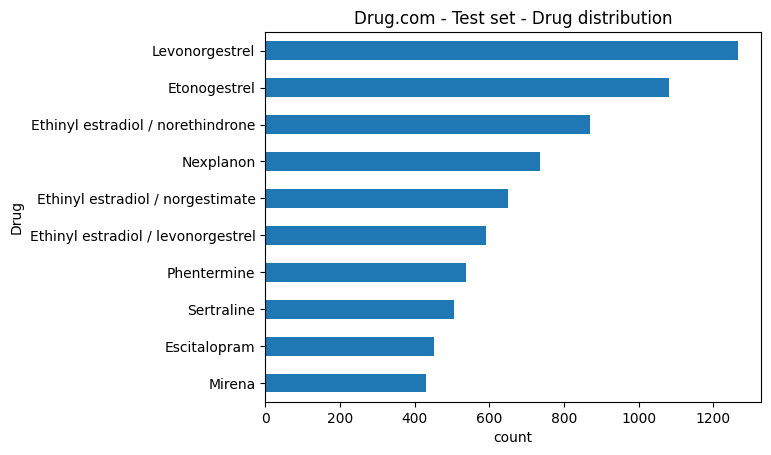

In [ ]:
df_drugs_train.drugName.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Drug.com - Train set - Drug distribution")
plt.xlabel("count")
plt.ylabel("Drug")
plt.show()

df_drugs_test.drugName.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Drug.com - Test set - Drug distribution")
plt.xlabel("count")
plt.ylabel("Drug")
plt.show()

The image is a horizontal bar chart titled "Drug.com - Train set - Drug distribution," illustrating the distribution of various drugs by count. The x-axis represents the count, ranging from 0 to approximately 3500, while the y-axis lists the drugs. Levonorgestrel has the highest count, and Mirena has the lowest, providing a clear visual comparison of the drug distribution in the dataset.

The image is a horizontal bar chart titled "Drug.com - Test set - Drug distribution," illustrating the distribution of various drugs by count. The x-axis ranges from 0 to approximately 1300, representing the count, while the y-axis lists the drugs. Levonorgestrel has the highest count, and Mirena has the lowest count in this dataset, providing a visual comparison of drug distribution in the test set.

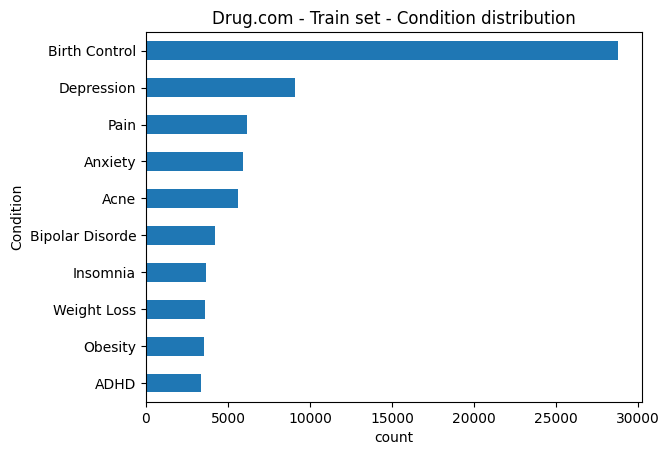

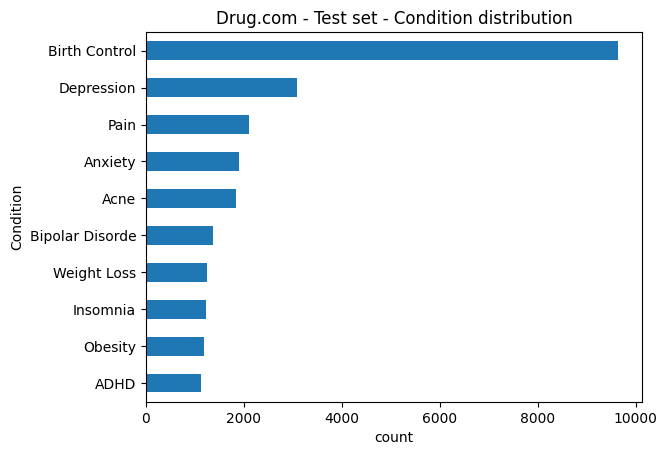

In [ ]:
df_drugs_train.condition.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Drug.com - Train set - Condition distribution")
plt.xlabel("count")
plt.ylabel("Condition")
plt.show()

df_drugs_test.condition.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Drug.com - Test set - Condition distribution")
plt.xlabel("count")
plt.ylabel("Condition")
plt.show()

The image is a horizontal bar chart titled "Drug.com - Train set - Condition distribution," illustrating the distribution of various medical conditions by count. The x-axis, representing the count, ranges from 0 to approximately 30,000, while the y-axis lists the conditions: Birth Control, Depression, Pain, Anxiety, Acne, Bipolar Disorder, Insomnia, Weight Loss, Obesity, and ADHD. Birth Control has the highest count, whereas ADHD has the lowest count among the listed conditions, providing a clear visual comparison of their distribution in the train set.

The test set has the same results with smaller data distribution

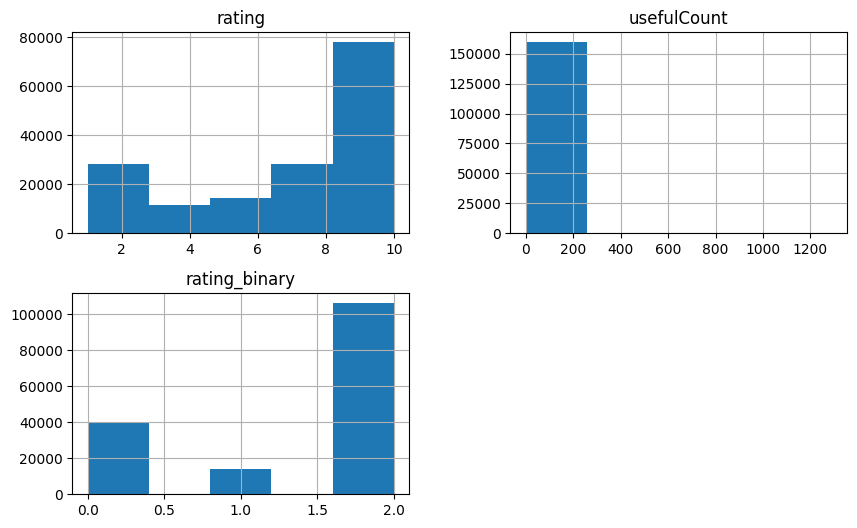

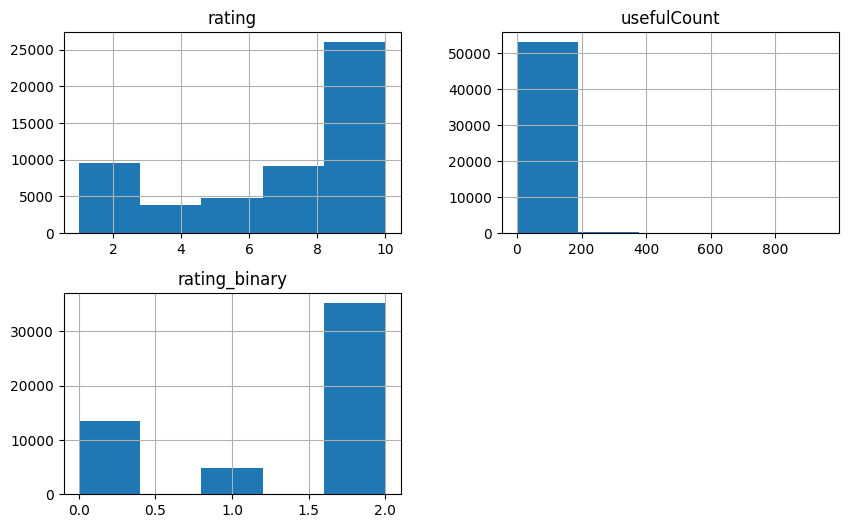

In [ ]:
df_drugs_train1 = df_drugs_train.drop(columns=['Unnamed: 0'])
df_drugs_train1.hist(bins=5, figsize=(10,6))
plt.show()

df_drugs_test1 = df_drugs_test.drop(columns=['Unnamed: 0'])
df_drugs_test1.hist(bins=5, figsize=(10,6))
plt.show()

<Axes: >

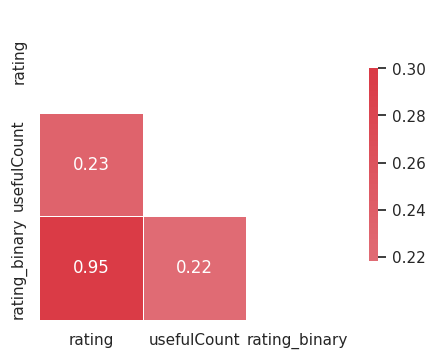

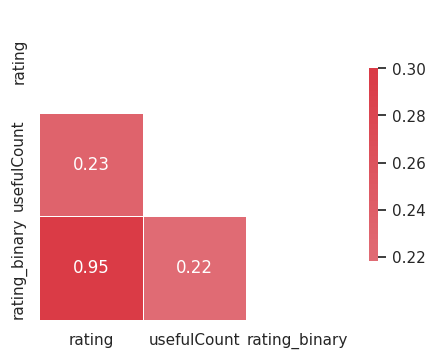

In [ ]:
df_drugs_train2 = df_drugs_train1.drop(columns=['condition','drugName','review','date'])
sns.set(style="white")

corr  = df_drugs_train2.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

df_drugs_test2 = df_drugs_test1.drop(columns=['condition','drugName','review','date'])
sns.set(style="white")

corr  = df_drugs_train2.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

The image is a heatmap illustrating the correlation between three variables: "rating," "usefulCount," and "rating_binary." The heatmap uses color-coded squares to represent the strength of the correlations. The correlation between "rating" and "usefulCount" is 0.23, shown in a light red square. The correlation between "rating" and "rating_binary" is 0.95, depicted by a dark red square, indicating a strong positive correlation. The correlation between "usefulCount" and "rating_binary" is 0.22, also shown in a light red square, indicating a weak positive correlation. A color bar on the right side of the heatmap ranges from 0.22 to 0.30, illustrating the intensity of the colors corresponding to the correlation values.

<ipython-input-18-d15aaacecd14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs_train1_pain_drug['date'] = pd.to_datetime(df_drugs_train1_pain_drug['date'],yearfirst = True)
<ipython-input-18-d15aaacecd14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs_train1_pain_drug['date'] = df_drugs_train1_pain_drug['date'].dt.strftime('%Y-%m-%d')
<ipython-input-18-d15aaacecd14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

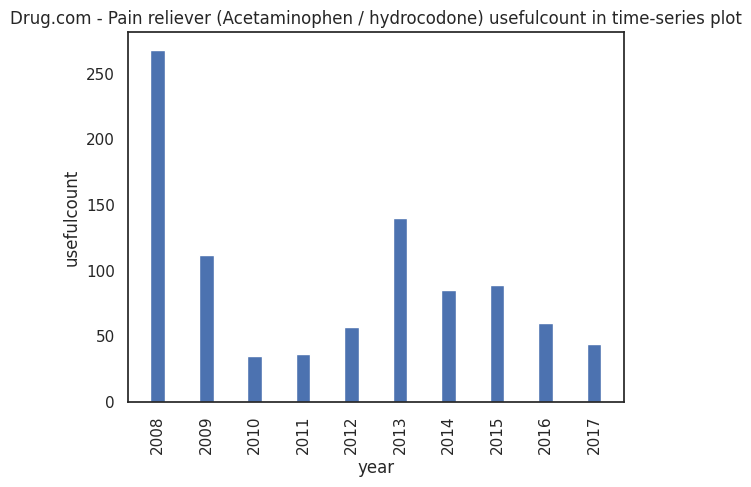

In [ ]:
df_drugs_train1_pain =  df_drugs_train1.loc[(df_drugs_train1['condition'] == "Pain")]
df_drugs_train1_pain_drug =  df_drugs_train1_pain.loc[(df_drugs_train1_pain['drugName'] == "Acetaminophen / hydrocodone")]
df_drugs_train1_pain_drug['date'] = pd.to_datetime(df_drugs_train1_pain_drug['date'],yearfirst = True)
df_drugs_train1_pain_drug['date'] = df_drugs_train1_pain_drug['date'].dt.strftime('%Y-%m-%d')
df_drugs_train1_pain_drug[['year', 'month', 'day']] = df_drugs_train1_pain_drug['date'].str.split('-', expand=True)
df_drugs_train1_pain_drug1 = df_drugs_train1_pain_drug.groupby('year')['usefulCount'].max().reset_index()
plt.bar(df_drugs_train1_pain_drug1['year'], df_drugs_train1_pain_drug1['usefulCount'], width = 0.3)
plt.title("Drug.com - Pain reliever (Acetaminophen / hydrocodone) usefulcount in time-series plot")
plt.xlabel("year")
plt.ylabel("usefulcount")
plt.xticks(rotation=90, fontsize=11)
plt.show()

The time-series plot shows the useful count of the pain reliever Acetaminophen/hydrocodone on Drugs.com from 2008 to 2017. The highest useful count was recorded in 2008, followed by a steep decline in 2009. The years 2010 to 2012 had relatively low useful counts, with slight increases in 2011 and 2012. Another significant peak occurred in 2013, followed by a gradual decline through 2014 and 2015. The useful count remained moderate from 2014 to 2016, with a noticeable drop in 2017. This trend indicates that the initial interest and usefulness of Acetaminophen/hydrocodone reviews were highest in 2008, fluctuated over the subsequent years, and declined towards 2017.

(-0.5, 1599.5, 799.5, -0.5)

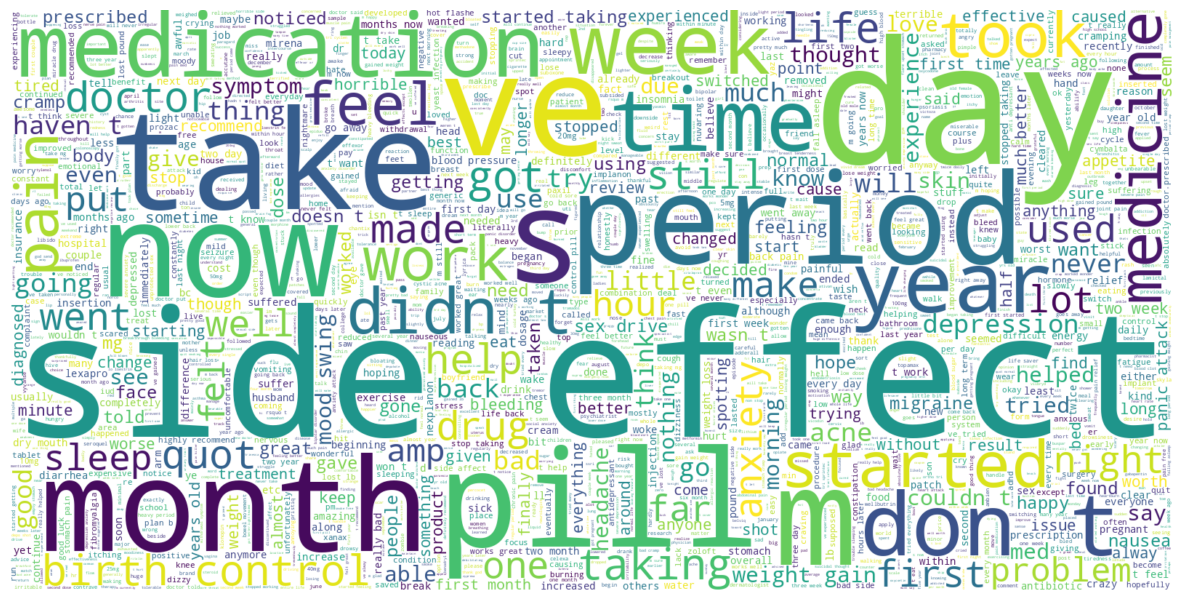

In [ ]:
plt.style.use('bmh')
word_string_drug_review =" ".join(df_drugs_train['review'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=3000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string_drug_review)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

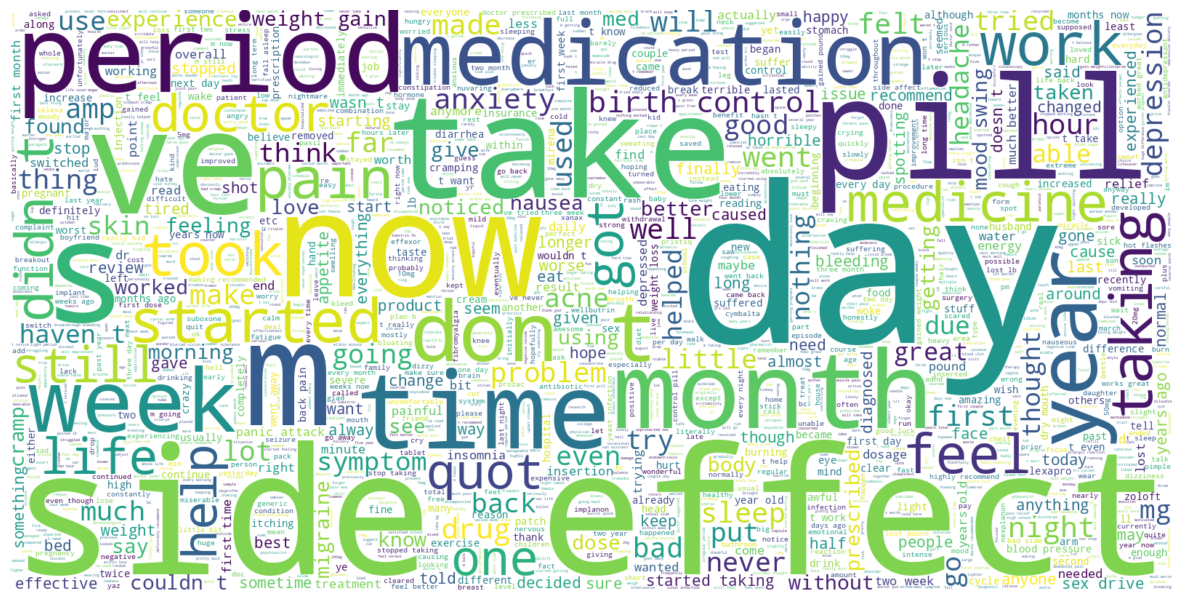

In [ ]:
plt.style.use('bmh')
word_string_drug_review_test =" ".join(df_drugs_test['review'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=3000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string_drug_review_test)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

The word cloud illustrates various terms related to medication and its effects, with the size of each word representing its frequency or prominence in the text. Notably, the most prominent words are "side effect," "take," "now," "month," "day," "period," "medication," "week," "year," and "work." Other significant words include "doctor," "time," "feel," "pill," "anxiety," "depression," "started," and "help." These words highlight common themes concerning the experiences and effects of taking medication, such as the duration of use, side effects, and the impact on health and well-being. The varying sizes and colors of the words provide visual emphasis on the most frequently mentioned terms.

##Web MD

WebMD has a larger dataset, including 362,806 rows and 12 columns. Our data analysis identified 7 categorical columns and 5 numerical columns. However, the dataset contains many missing data points and confusing values, such as the "other" condition. To clean the data, we removed all missing and confusing values, reducing the dataset size to 280,109 rows.

We also calculated the overall rating column by averaging the values from the satisfaction and ease of use columns, then multiplying the average by 2. We ensured the resulting values fell within the range of 1 to 10. Finally, we created an overall rating binary by reclassifying the overall rating column for binary classification.

In [ ]:
df_webmd = pd.read_csv("./data/webmd/webmd.csv", delimiter=',')
df_webmd.head(10)

Age                      Condition        Date  \
0  75 or over                    Stuffy Nose   9/21/2014   
1       25-34                  Cold Symptoms   1/13/2011   
2       65-74                          Other   7/16/2012   
3  75 or over                          Other   9/23/2010   
4       35-44                          Other    1/6/2009   
5       55-64                          Other   7/19/2008   
6       25-34                  Birth Control   6/15/2017   
7       45-54  Disease of Ovaries with Cysts   1/30/2017   
8       25-34                           Acne   4/27/2016   
9       55-64                    Stuffy Nose  10/29/2012   

                                      Drug  DrugId  EaseofUse  Effectiveness  \
0                             25dph-7.5peh  146724          5              5   
1                             25dph-7.5peh  146724          5              5   
2             warfarin (bulk) 100 % powder  144731          2              3   
3             warfarin (bulk) 100 % powder  144731          2              2   
4             warfarin (bulk) 100 % powder  144731          1              1   
5             warfarin (bulk) 100 % powder  144731          4              4   
6                                wymzya fe  163180          5              5   
7                                wymzya fe  163180          5              5   
8                                wymzya fe  163180          4              2   
9  12 hour nasal relief spray, non-aerosol    9800          4              2   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   
5                help heart condition operation well             4    Male   
6  Haven't gotten pregnant so it does it's job. I...             2  Female   
7  I have take this for 5 years age 45-50 to prev...             5  Female   
8                                                                2  Female   
9   The 12 hour spray only works for me for 6 hours.             2    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1  
5                                                               0  
6  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0  
7  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0  
8  Nausea ,  vomiting ,  headache ,  bloating ,  ...            1  
9  Temporary burning, stinging, dryness in the no...            0

In [ ]:
df_webmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
# Replacing empty values with NaN then removing them from the dataset, then reassigning index

print("\n Check for any null values in dataset:")
df_webmd = df_webmd.replace(r'^\s*$', np.nan, regex=True)
print(pd.isnull(df_webmd).sum())

print("\n Removing null values in dataset:")
df_webmd = df_webmd.dropna()
print(pd.isnull(df_webmd).sum())

print("\n Reassigning index")
df_webmd = df_webmd.reset_index(drop=True)


 Check for any null values in dataset:
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41889
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

 Removing null values in dataset:
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

 Reassigning index


In [ ]:
df_webmd = df_webmd.loc[df_webmd['Condition'] != "Other"]
df_webmd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242060 entries, 0 to 280108
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            242060 non-null  object
 1   Condition      242060 non-null  object
 2   Date           242060 non-null  object
 3   Drug           242060 non-null  object
 4   DrugId         242060 non-null  int64 
 5   EaseofUse      242060 non-null  int64 
 6   Effectiveness  242060 non-null  int64 
 7   Reviews        242060 non-null  object
 8   Satisfaction   242060 non-null  int64 
 9   Sex            242060 non-null  object
 10  Sides          242060 non-null  object
 11  UsefulCount    242060 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 24.0+ MB


In [ ]:
df_webmd.Condition.value_counts().head(10)

Condition
Pain                                             19081
High Blood Pressure                              17897
Depression                                       11987
Birth Control                                    10608
Neuropathic Pain                                  7079
Chronic Trouble Sleeping                          5911
Attention Deficit Disorder with Hyperactivity     5588
Type 2 Diabetes Mellitus                          5265
Bipolar Depression                                4914
Migraine Prevention                               4135
Name: count, dtype: int64

In [ ]:
# Convert all object columns as strings as object dtype is not required
object_columns = list(df_webmd.select_dtypes(include='object').columns)
df_webmd[object_columns] = df_webmd[object_columns].astype('string')

# Determining numerical and categorical columns
numerical_df = df_webmd.select_dtypes(include=['number'])
numerical_columns = [col for col in df_webmd.columns if df_webmd[col].dtype.name == 'int64']
categorical_columns_df = df_webmd.select_dtypes(include=['string'])
categorical_columns_categorical = [col for col in df_webmd.columns if df_webmd[col].dtype.name == 'string']

print(categorical_columns_categorical, numerical_columns)

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides'] ['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount']


In [ ]:
df_webmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280109 entries, 0 to 280108
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            280109 non-null  string
 1   Condition      280109 non-null  string
 2   Date           280109 non-null  string
 3   Drug           280109 non-null  string
 4   DrugId         280109 non-null  int64 
 5   EaseofUse      280109 non-null  int64 
 6   Effectiveness  280109 non-null  int64 
 7   Reviews        280109 non-null  string
 8   Satisfaction   280109 non-null  int64 
 9   Sex            280109 non-null  string
 10  Sides          280109 non-null  string
 11  UsefulCount    280109 non-null  int64 
dtypes: int64(5), string(7)
memory usage: 25.6 MB


In [ ]:
# Combine 2 int columns: satisfaction and ease of use on a 1 to 5 scale into 1 column for overall rating with a scale of 1 to 10 to match drugs.com format

# Convert integer columns to float
df_webmd[['Satisfaction', 'EaseofUse']] = df_webmd[['Satisfaction', 'EaseofUse']].astype(float)

# Calculate the mean of the three columns
df_webmd['overall_rating'] = (df_webmd['Satisfaction'] + df_webmd['EaseofUse']) / 2

# Rescale the mean to fit the desired scale (1 to 10)
df_webmd['overall_rating'] = df_webmd['overall_rating'] * 2

# Round to the nearest integer
df_webmd['overall_rating'] = df_webmd['overall_rating'].round().astype(float)

# Ensure the overall rating is within the desired range (1 to 10)
df_webmd['overall_rating'] = df_webmd['overall_rating'].clip(1.0, 10.0)

# Drop the individual rating columns if needed
df_webmd.drop(['Satisfaction', 'EaseofUse'], axis=1, inplace=True)

# Check the distribution of the overall rating
print(df_webmd['overall_rating'].value_counts())

overall_rating
10.0    75677
6.0     39649
8.0     36290
9.0     31551
2.0     24804
7.0     24036
5.0     22704
4.0     17149
3.0      8249
Name: count, dtype: int64


In [ ]:
df_webmd.head()

Age                      Condition        Date  \
0  75 or over                    Stuffy Nose   9/21/2014   
1       25-34                  Cold Symptoms   1/13/2011   
2       25-34                  Birth Control   6/15/2017   
3       45-54  Disease of Ovaries with Cysts   1/30/2017   
4       55-64                    Stuffy Nose  10/29/2012   

                                      Drug  DrugId  Effectiveness  \
0                             25dph-7.5peh  146724              5   
1                             25dph-7.5peh  146724              5   
2                                wymzya fe  163180              5   
3                                wymzya fe  163180              5   
4  12 hour nasal relief spray, non-aerosol    9800              2   

                                             Reviews     Sex  \
0  I'm a retired physician and of all the meds I ...    Male   
1  cleared me right up even with my throat hurtin...  Female   
2  Haven't gotten pregnant so it does it's job. I...  Female   
3  I have take this for 5 years age 45-50 to prev...  Female   
4   The 12 hour spray only works for me for 6 hours.    Male   

                                               Sides  UsefulCount  \
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0   
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1   
2  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
3  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
4  Temporary burning, stinging, dryness in the no...            0   

   overall_rating  
0            10.0  
1            10.0  
2             7.0  
3            10.0  
4             6.0

In [ ]:
# Create new numerical column for reviews to do the binary classification

df_webmd['overall_rating_binary'] = np.where(df_webmd['overall_rating'] <= 4.0, 0,
                                           np.where(df_webmd['overall_rating'] < 7.0, 1, 2))

df_webmd.drop('overall_rating', axis=1, inplace=True)
print(df_webmd['overall_rating_binary'].value_counts())

overall_rating_binary
2    167554
1     62353
0     50202
Name: count, dtype: int64


In [ ]:
df_webmd.head()

Age                      Condition        Date  \
0  75 or over                    Stuffy Nose   9/21/2014   
1       25-34                  Cold Symptoms   1/13/2011   
2       25-34                  Birth Control   6/15/2017   
3       45-54  Disease of Ovaries with Cysts   1/30/2017   
4       55-64                    Stuffy Nose  10/29/2012   

                                      Drug  DrugId  Effectiveness  \
0                             25dph-7.5peh  146724              5   
1                             25dph-7.5peh  146724              5   
2                                wymzya fe  163180              5   
3                                wymzya fe  163180              5   
4  12 hour nasal relief spray, non-aerosol    9800              2   

                                             Reviews     Sex  \
0  I'm a retired physician and of all the meds I ...    Male   
1  cleared me right up even with my throat hurtin...  Female   
2  Haven't gotten pregnant so it does it's job. I...  Female   
3  I have take this for 5 years age 45-50 to prev...  Female   
4   The 12 hour spray only works for me for 6 hours.    Male   

                                               Sides  UsefulCount  \
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0   
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1   
2  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
3  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
4  Temporary burning, stinging, dryness in the no...            0   

   overall_rating_binary  
0                      2  
1                      2  
2                      2  
3                      2  
4                      1

In [ ]:
df_webmd_pain =  df_webmd.loc[(df_webmd2['Condition'] == "Pain")]
df_webmd_pain.Drug.value_counts().head(5)

Drug
hydrocodone-acetaminophen    2688
tramadol hcl                 1385
tramadol hcl er              1385
oxycodone hcl er             1068
oxycodone hcl                1068
Name: count, dtype: int64

In [ ]:
df_webmd_pain_drug =  df_webmd_pain.loc[(df_webmd_pain['Drug'] == "hydrocodone-acetaminophen")]

In [ ]:
df_webmd_pain_drug['Date'] = pd.to_datetime(df_webmd_pain_drug['Date'],yearfirst = True)
df_webmd_pain_drug['Date'] = df_webmd_pain_drug['Date'].dt.strftime('%Y-%m-%d')
df_webmd_pain_drug[['year', 'month', 'day']] = df_webmd_pain_drug['Date'].str.split('-', expand=True)

<ipython-input-41-cdc3d307da37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_webmd2_pain_drug['Date'] = pd.to_datetime(df_webmd2_pain_drug['Date'],yearfirst = True)
<ipython-input-41-cdc3d307da37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_webmd2_pain_drug['Date'] = df_webmd2_pain_drug['Date'].dt.strftime('%Y-%m-%d')
<ipython-input-41-cdc3d307da37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
df_webmd_pain_drug1 = df_webmd_pain_drug.groupby('year')['UsefulCount'].max().reset_index()

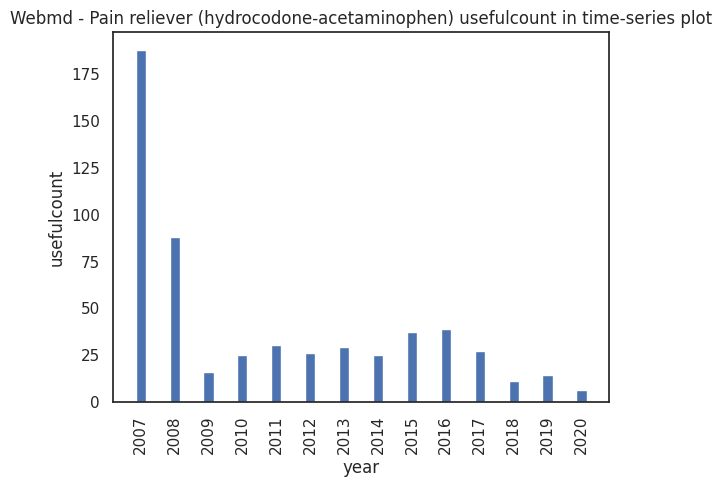

In [ ]:
plt.bar(df_webmd_pain_drug1['year'], df_webmd_pain_drug1['UsefulCount'], width = 0.3)
plt.title("Webmd - Pain reliever (hydrocodone-acetaminophen) usefulcount in time-series plot")
plt.xlabel("year")
plt.ylabel("usefulcount")
plt.xticks(rotation=90, fontsize=11)
plt.show()

The time-series plot illustrates the useful count of a pain reliever (hydrocodone-acetaminophen) on WebMD from 2007 to 2020. The highest useful count was observed in 2007, followed by a significant drop in 2008. Subsequent years show a relatively steady but lower number of useful counts, with some fluctuations between 2010 and 2017. Notable peaks occurred in 2015 and 2016. From 2017 onwards, there is a clear downward trend, culminating in minimal useful counts by 2020. This pattern suggests that the highest engagement or perceived usefulness of hydrocodone-acetaminophen reviews was in 2007, with a gradual decline over the years.

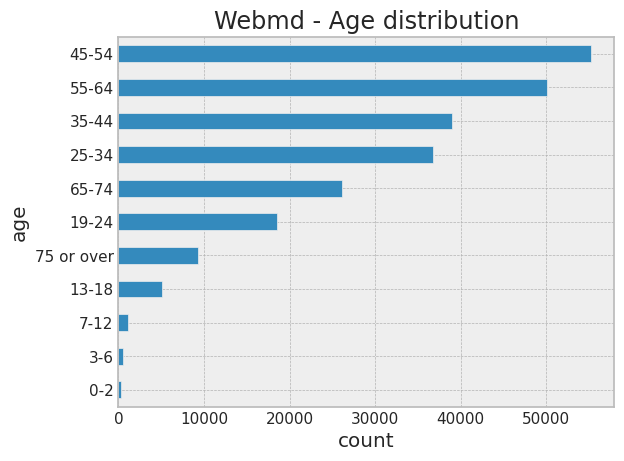

In [ ]:
df_webmd.Age.value_counts().sort_values().plot(kind='barh')
plt.title("Webmd - Age distribution")
plt.xlabel("count")
plt.ylabel("age")
plt.show()

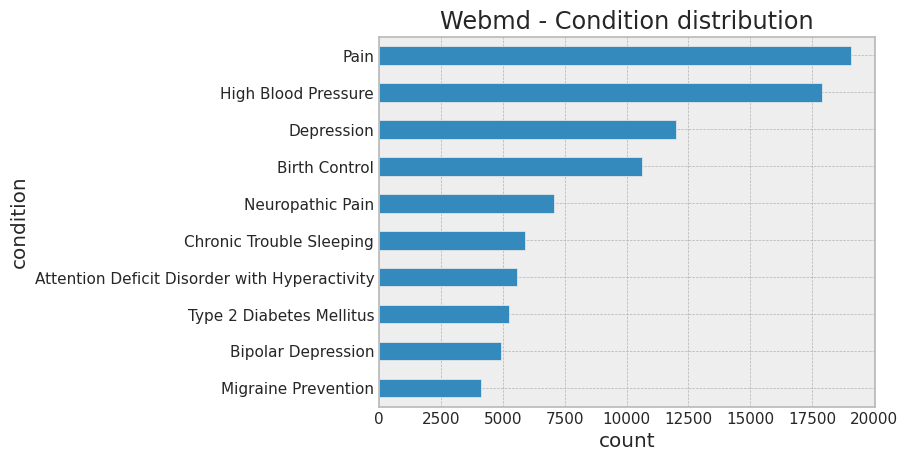

In [ ]:
df_webmd.Condition.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Webmd - Condition distribution")
plt.xlabel("count")
plt.ylabel("condition")
plt.show()

The image is a horizontal bar chart titled "Webmd - Condition distribution," illustrating the distribution of various medical conditions by count. The x-axis, representing the count, ranges from 0 to approximately 20,000, while the y-axis lists the conditions: Pain, High Blood Pressure, Depression, Birth Control, Neuropathic Pain, Chronic Trouble Sleeping, Attention Deficit Disorder with Hyperactivity, Type 2 Diabetes Mellitus, Bipolar Depression, and Migraine Prevention. Pain has the highest count, whereas Migraine Prevention has the lowest count among the listed conditions, providing a clear visual comparison of their distribution.








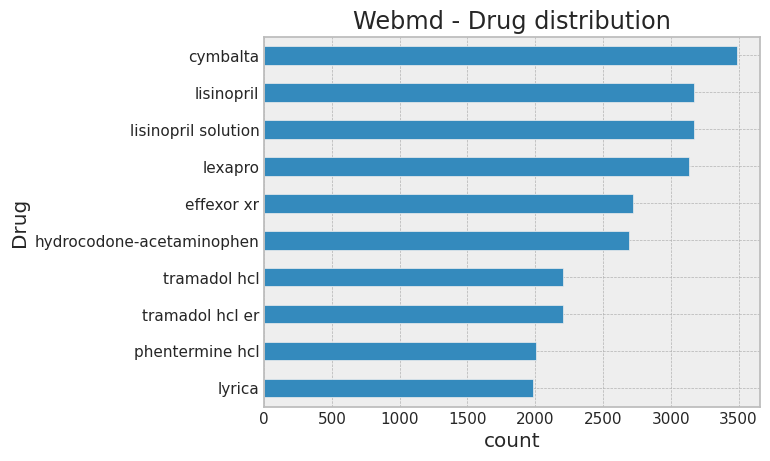

In [ ]:
df_webmd.Drug.value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Webmd - Drug distribution")
plt.xlabel("count")
plt.ylabel("Drug")
plt.show()

The image is a horizontal bar chart titled "Webmd - Drug distribution," illustrating the distribution of various drugs by count. The x-axis, representing the count, ranges from 0 to approximately 3500, while the y-axis lists the drugs. Cymbalta has the highest count, whereas Lyrica has the lowest count among the listed drugs, providing a clear visual comparison of their distribution.

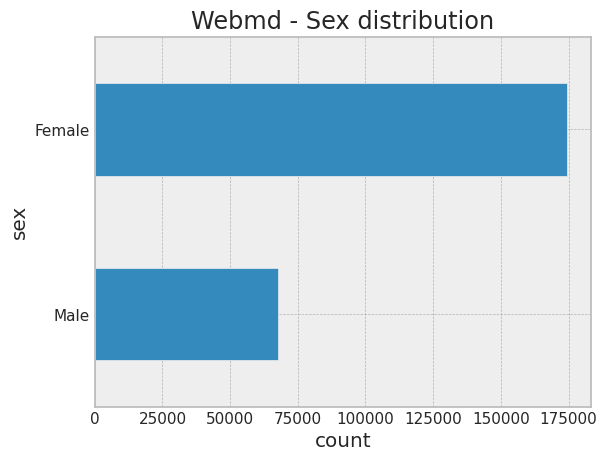

In [ ]:
df_webmd.Sex.value_counts().sort_values().plot(kind='barh')
plt.title("Webmd - Sex distribution")
plt.xlabel("count")
plt.ylabel("sex")
plt.show()

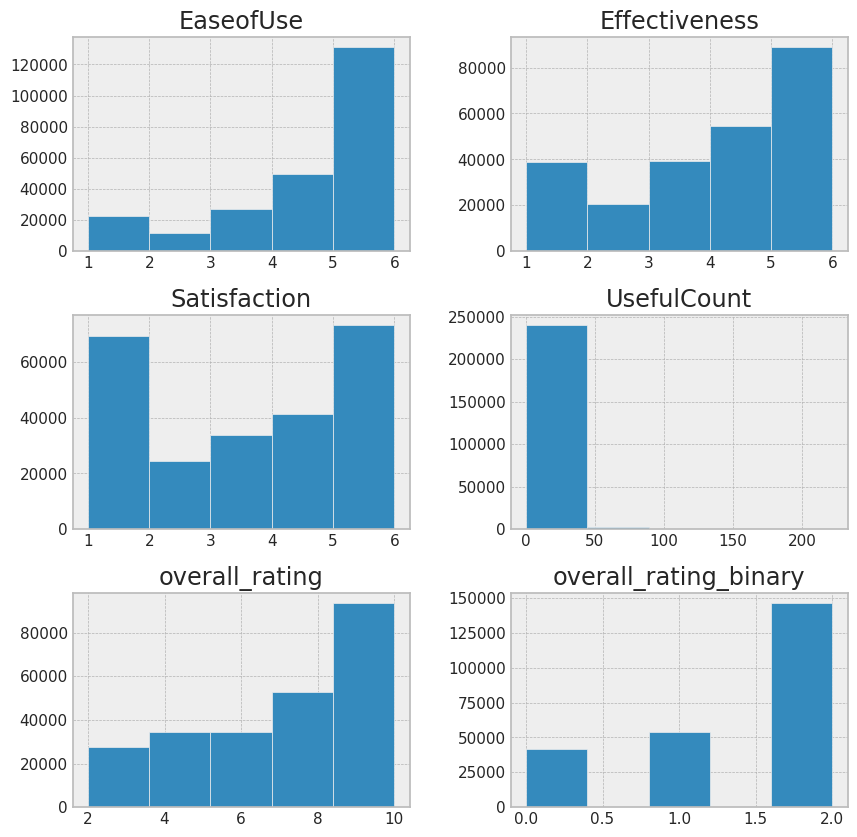

In [ ]:
df_webmd3 = df_webmd.drop(columns=['DrugId'])
df_webmd3.hist(bins=5, figsize=(10,10))
plt.show()

<Axes: >

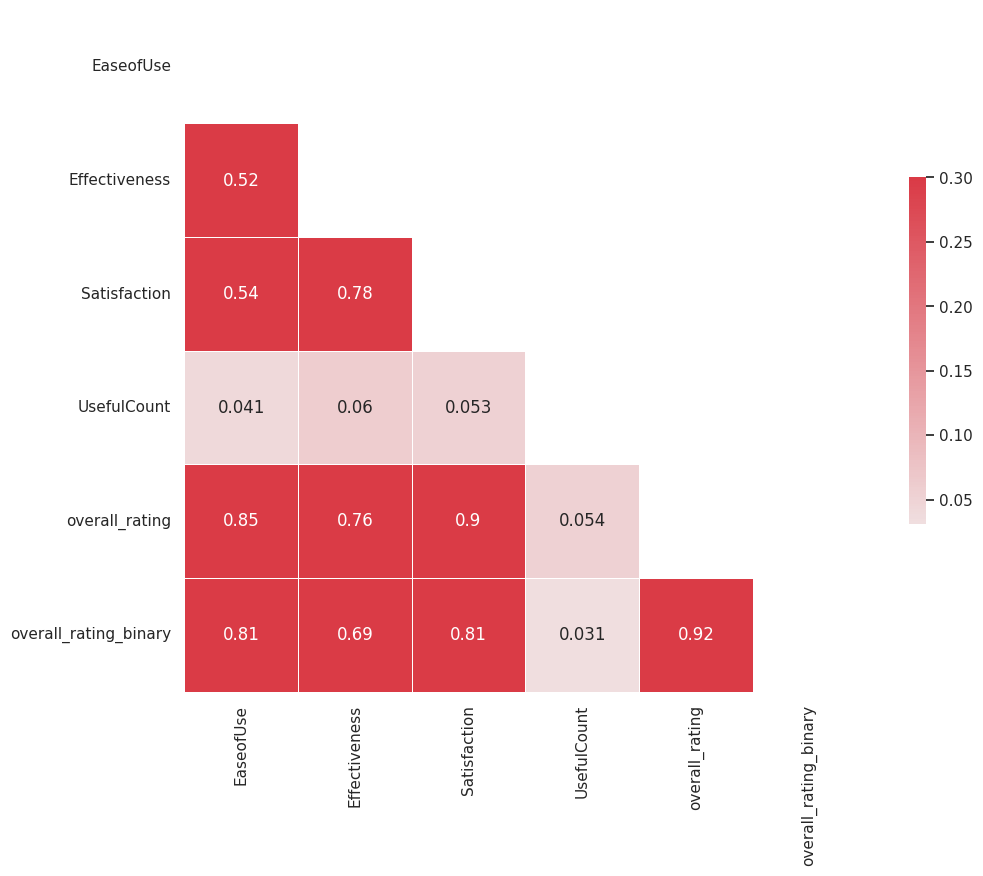

In [ ]:
df_webmd4 = df_webmd3.drop(columns=['Age','Condition','Date','Drug','Reviews','Sex','Sides'])
sns.set(style="white")

corr  = df_webmd4.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

The heatmap illustrates the correlations between six variables: Ease of Use, Effectiveness, Satisfaction, Useful Count, Overall Rating, and Overall Rating Binary. Key correlations include strong positive relationships between Overall Rating and Satisfaction (0.9), Overall Rating and Ease of Use (0.85), and Overall Rating Binary and Overall Rating (0.92). Moderate correlations are seen between Ease of Use with both Effectiveness (0.52) and Satisfaction (0.54), and between Effectiveness and Satisfaction (0.78). Useful Count shows weak correlations with other variables, such as 0.041 with Ease of Use and 0.053 with Satisfaction. The color intensity reflects the strength of these correlations, with darker red squares indicating stronger correlations.

(-0.5, 1599.5, 799.5, -0.5)

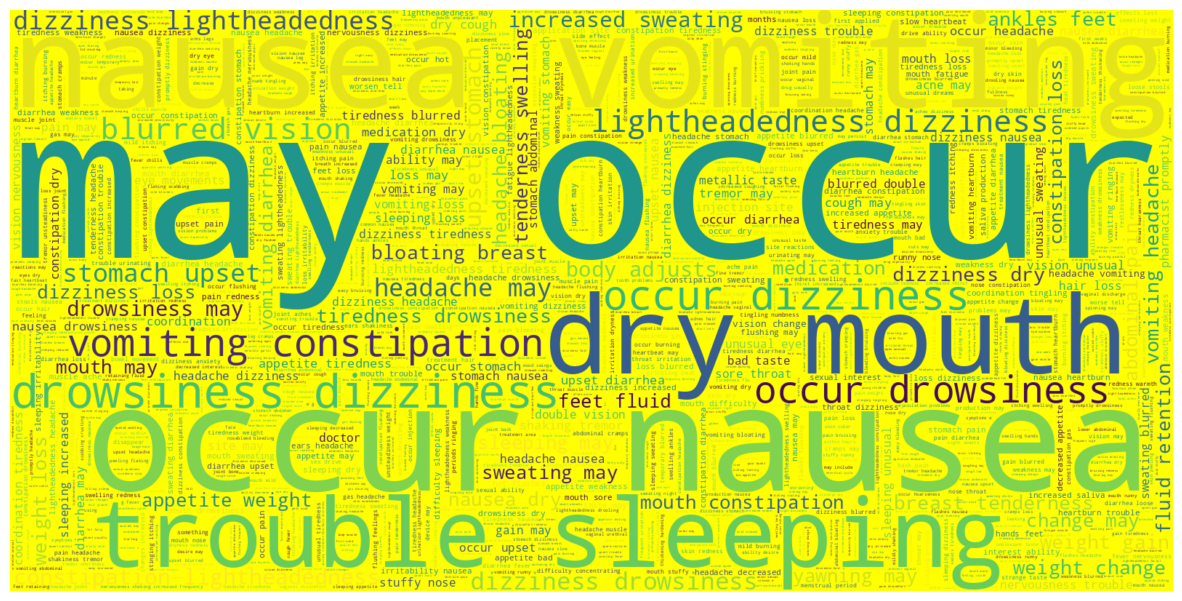

In [ ]:
# Word Cloud for Side Effects

plt.style.use('bmh')
word_string_webmd=" ".join(df_webmd['Sides'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="yellow", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string_webmd)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

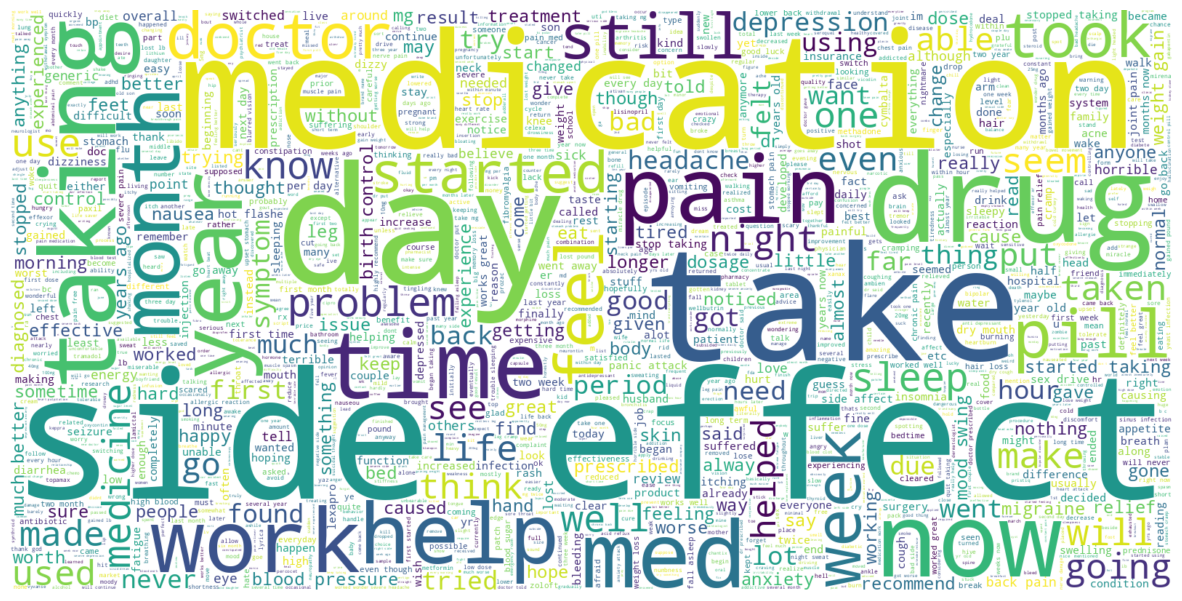

In [ ]:
# Word Cloud for Reviews

word_string_review =" ".join(df_webmd['Reviews'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=3000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string_review)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

The word cloud depicts various terms related to medication and its effects, with the size of each word indicating its frequency or prominence in the text. Prominent words include "side effect," "take," "medication," "day," "time," "month," "year," "pain," "drug," and "work." Other notable words are "doctor," "pill," "started," "problem," "help," "night," "used," "effective," "back," "sleep," and "feel." These words highlight common themes around the experiences and impacts of taking medication, such as side effects, duration of use, and effectiveness. The varying sizes and colors of the words provide visual emphasis on the most frequently mentioned terms, reflecting the primary concerns and experiences of individuals related to medication use.








##In-Domain Sentiment Analysis

##Traditional NLP Methods

##Drug Effectiveness and Satisfaction Analysis using Logistic Regression

For the Logistic Regression model, we develop a function to process text to lowercase, remove punctuation, and numbers, and tokenize on spaces, matching the paper's methodology. We apply a n-grams approach to represent the user reviews features using unigrams, bi-grams and tri-grams and prepare X and y datasets for modeling. No stop words were removed from the text, however, to reduce the feature space, terms that have a relative document frequency higher than the max threshold of 0.95 were discarded when building the vocabulary.  The model includes a pipeline, parameter tuning, and 5-fold cross-validation, and it's evaluated on both train and test sets, calculating Cohen’s kappa score. Due to the model's heaviness causing crashes, we save the model for subsequent runs.

In the second trial, we reload the model, recalculating the accuracy and Cohen’s kappa scores, and generated a Classification Report and Feature Importance. The drug.com outcome shows a Classification Report with an overall accuracy of 0.92, detailing precision, recall, and F1-score metrics for three classes.

Each feature in the model is associated with a coefficient (weight) that indicates the importance of the feature in determining the output. Features with higher absolute coefficient magnitudes have a stronger influence on the model's predictions. The bar chart of Drug.com highlighted the top significant predictive features in product reviews, such as "disappointed," "waste," and "never again," with all coefficient magnitudes from 0.0 to 1.6. Similarly, the Webmd outcome included a Classification Report with an overall accuracy of 0.75 and a bar chart showing key predictive features like "no relief," "ineffective," and "combivent," indicating their strong impact on negative sentiment. The majority of the top coefficients were negative sentiments.

## Drugs.com

In [ ]:
# Setting up a function to process text, extract n-grams features, and set up X and y datasets for modeling use

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize on spaces
    tokens = text.split()
    return ' '.join(tokens)

# Apply preprocessing to the text column
df_drugs_train['clean_text'] = df_drugs_train['review'].apply(preprocess_text)
df_drugs_test['clean_text'] = df_drugs_test['review'].apply(preprocess_text)

# Extract n-grams features and use a max threshold to reduce the feature space
count_vect = CountVectorizer(ngram_range=(1, 3), max_df=0.95)
X_train = count_vect.fit_transform(df_drugs_train['clean_text'])
X_test = count_vect.transform(df_drugs_test['clean_text'])

# Get labels
y_train = df_drugs_train['rating_binary']
y_test = df_drugs_test['rating_binary']

# Output shapes
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)
print("y_train Value Counts:", y_train.value_counts())
print("y_test Value Counts:", y_test.value_counts())

Train Features Shape: (160396, 5081571)
Test Features Shape: (53469, 5081571)
Train Labels Shape: (160396,)
Test Labels Shape: (53469,)
y_train Value Counts: rating_binary
2    106308
0     39828
1     14260
Name: count, dtype: int64
y_test Value Counts: rating_binary
2    35248
0    13428
1     4793
Name: count, dtype: int64


In [ ]:
# Define the pipeline including Logistic Regression
pipeline = Pipeline([
    ('clf', LogisticRegression(class_weight='balanced'))
])

# Define grid search parameters
parameters = {
    'clf__C': [0.01, 1],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=6)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Calculate Cohen's Kappa score
y_pred = best_model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

# Save the best model
joblib.dump(best_model, 'best_LR_model1.pkl')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cohen's Kappa Score:", kappa)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9947069165450941
Test Accuracy: 0.9158235305118663
Cohen's Kappa Score: 0.8279227520843739


In [ ]:
#Load the previous run model and acquire metrics to use for visualizations

# Load the saved model
loaded_model = joblib.load('/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/best_LR_model1.pkl')

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, loaded_model.predict(X_train))

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, loaded_model.predict(X_test))

# Calculate Cohen's Kappa score
y_pred = loaded_model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cohen's Kappa Score:", kappa)

Train Accuracy: 0.9947069165450941
Test Accuracy: 0.9158235305118663
Cohen's Kappa Score: 0.8279227520843739


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     13428
           1       0.79      0.65      0.71      4793
           2       0.95      0.96      0.95     35250

    accuracy                           0.92     53471
   macro avg       0.87      0.84      0.85     53471
weighted avg       0.91      0.92      0.91     53471



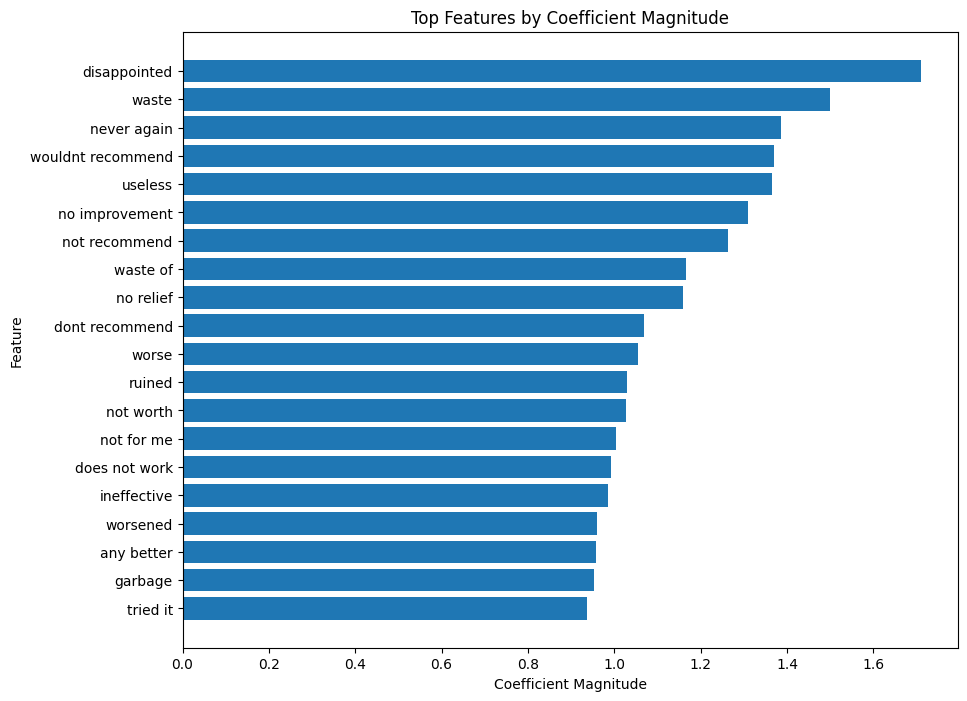

In [ ]:
# Output Classification Report and Feature Importance

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance (for Logistic Regression)
feature_names = count_vect.get_feature_names_out()  # Access feature names directly from CountVectorizer
coefficients = loaded_model.named_steps['clf'].coef_[0]

# Sort coefficients by magnitude
sorted_indices = np.argsort(coefficients)
top_features = 20  # Number of top features to display
plt.figure(figsize=(10, 8))
plt.barh(range(top_features), coefficients[sorted_indices[-top_features:]])
plt.yticks(range(top_features), [feature_names[i] for i in sorted_indices[-top_features:]])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude')
plt.show()

The drug.com outcome presents a Classification Report table on top and a bar chart at the bottom. The Classification Report details precision, recall, F1-score, and support metrics for three classes, with an overall accuracy of 0.92. The train accuracy was severely overfitted (0.99) even with using balanced class weights to reduce class imbalance. Negative sentiment (Class 0) has a precision of 0.88, recall of 0.90, and F1-score of 0.89; Neutral Sentiment (Class 1) shows 0.79, 0.65, and 0.71, respectively; Positive sentiment (Class 2) reports 0.95, 0.96, and 0.95. The macro average precision, recall, and F1-score are 0.87, 0.84, and 0.85, while the weighted averages are 0.91, 0.92, and 0.91. The bar chart highlights significant negative features in product reviews, with "disappointed," "waste," "never again," "wouldn't recommend," and "useless" having the highest coefficient magnitudes, indicating their strong impact on the overall negative sentiment. The coefficient magnitudes range from 0.0 to 1.6.

##Web MD

In [ ]:
# Apply Pre-Processing Tokenization on Reviews, extract n-grams, and split data into train and test datasets

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize on spaces
    tokens = text.split()
    return ' '.join(tokens)

# Apply preprocessing to the text column
df_webmd['clean_text'] = df_webmd['Reviews'].apply(preprocess_text)

# Extract n-grams features and use a max threshold to reduce the feature space
count_vect = CountVectorizer(ngram_range=(1, 3), max_df=0.95)
X = count_vect.fit_transform(df_webmd['clean_text'])
y = df_webmd['overall_rating_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(224087, 7284206)
(56022, 7284206)
(224087,)
(56022,)
overall_rating_binary
2    134233
1     49777
0     40077
Name: count, dtype: int64
overall_rating_binary
2    33321
1    12576
0    10125
Name: count, dtype: int64


In [ ]:
# Create pipeline for Logistic Regression, define grid search parameters, fit the model, and determine scoring metrics

# Define the pipeline including Logistic Regression
pipeline = Pipeline([
    ('clf', LogisticRegression(class_weight='balanced'))
])

# Define grid search parameters
parameters = {
    'clf__C': [0.1, 1],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Save the best model
joblib.dump(best_model, 'best_LR_webmd_model1.pkl')

# Calculate Cohen's Kappa score
y_pred = best_model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cohen's Kappa Score:", kappa)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9454943838776904
Test Accuracy: 0.7544536075113348
Cohen's Kappa Score: 0.5658594393821175


In [ ]:
#Load the previous run model and acquire metrics to use for visualizations

# Load the saved model
loaded_model = joblib.load('/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/best_LR_webmd_model1.pkl')

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, loaded_model.predict(X_train))

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, loaded_model.predict(X_test))

# Calculate Cohen's Kappa score
y_pred = loaded_model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cohen's Kappa Score:", kappa)

Train Accuracy: 0.9454943838776904
Test Accuracy: 0.7544536075113348
Cohen's Kappa Score: 0.5658594393821175


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62     10125
           1       0.58      0.56      0.57     12576
           2       0.87      0.86      0.87     33321

    accuracy                           0.75     56022
   macro avg       0.68      0.69      0.69     56022
weighted avg       0.76      0.75      0.75     56022



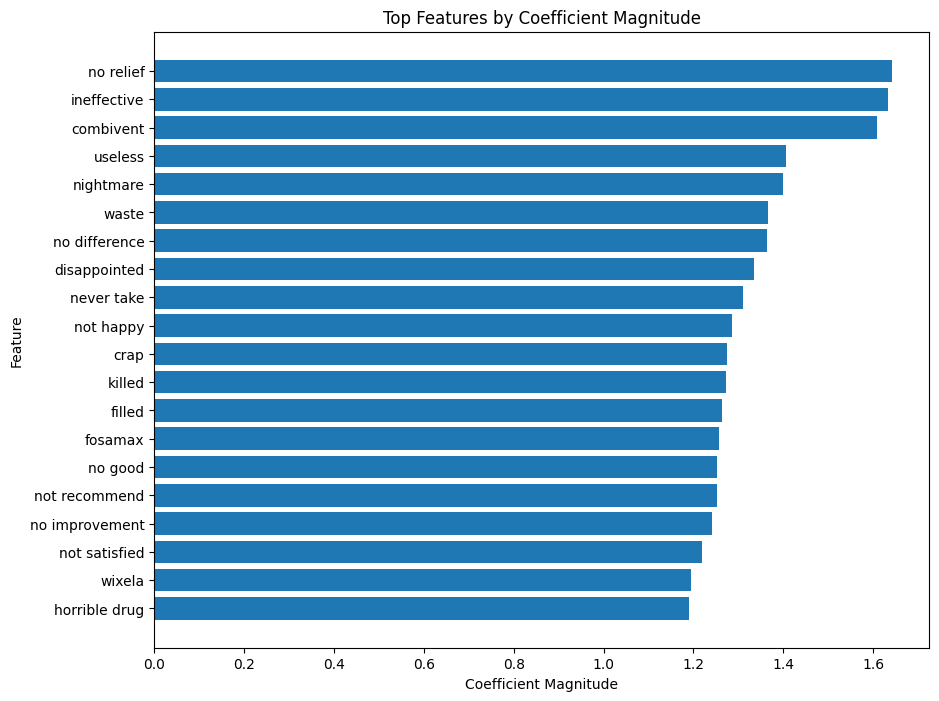

In [ ]:
# Output Classification Report and Feature Importance

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance (for Logistic Regression)
feature_names = count_vect.get_feature_names_out()  # Access feature names directly from CountVectorizer
coefficients = loaded_model.named_steps['clf'].coef_[0]

# Sort coefficients by magnitude
sorted_indices = np.argsort(coefficients)
top_features = 20  # Number of top features to display
plt.figure(figsize=(10, 8))
plt.barh(range(top_features), coefficients[sorted_indices[-top_features:]])
plt.yticks(range(top_features), [feature_names[i] for i in sorted_indices[-top_features:]])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude')
plt.show()


The Webmd outcome includes a Classification Report on the top and a bar chart at the bottom. The Classification Report provides metrics for three classes, with an overall accuracy of 0.75. The train accuracy was still overfitted (0.94)albeit less than drugs.com even with using balanced class weights to reduce class imbalance. Negative sentiment (Class 0) has a precision of 0.60, recall of 0.64, and F1-score of 0.62; Neutral sentiment (Class 1) shows 0.58, 0.56, and 0.57, respectively; Positive sentiment (Class 2) reports 0.87, 0.86, and 0.87. The macro average precision, recall, and F1-score are 0.68, 0.69, and 0.69, while the weighted averages are 0.76, 0.75, and 0.75. The bar chart highlights key negative features in product reviews, with "no relief," "ineffective," "combivent," "useless," and "nightmare" having the highest coefficient magnitudes, ranging from 0.0 to 1.6, indicating their strong impact on the overall negative sentiment.

##Side Effect Analysis using Linear Regression

We use the tokenize method to preprocess side effects into a list of strings, which we add to a new column, and split the side effect list into multiple rows for distribution analysis. A horizontal bar chart titled "Webmd - Side Effect Distribution" shows side effect counts, with dizziness having the highest count, followed by nausea, and tiredness the lowest. We also tokenize review text into strings, adding them to a new column, and count the frequency of each side effect to create a "side_rating" column. Another chart titled "Webmd - Side Effect Rating Distribution" shows that most side effects are rated at the lower end, with rating 0 being the highest. We convert "side_rating" to a binary scale: 0 for no side effects, 1 for moderate, and 2 for severe.

Due to time constraints with logistic regression, we use linear regression to calculate the Kappa Score and RMSE, with an 80/20 train-test split, using SimpleImputer and StandardScaler for numerical columns and OneHotEncoder for object columns. We replicate these steps for the Drug.com dataset, creating a model and a chart titled "Drug.com - Train Set - Side Effect Rating Distribution," which also shows that most side effects are rated at the lower end, particularly with ratings 0, 1, and 2.

## Drugs.com

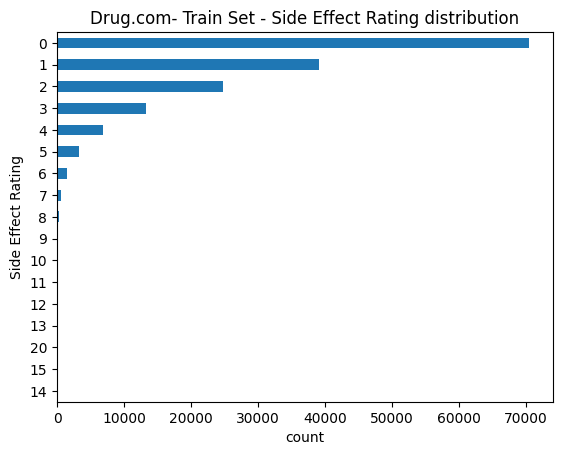

In [ ]:
def preprocess_text_review(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize on spaces
    tokens = text.split()
    return tokens

# Drop some columns and apply preprocessing function into review column
df_drugs_train['new_review'] = df_drugs_train['review'].apply(preprocess_text_review)

#Counting the side effect frequency in the review and get the total number
def CounterReview(text):
    counter = Counter(text)
    occurrences = sum(counter[v] for v in side_effect)
    return occurrences
#add new column for side effect evaluation base on review
df_drugs_train['SideRating'] = df_drugs_train['new_review'].apply(CounterReview)

df_drugs_train['SideRating'].value_counts().sort_values().plot(kind='barh')
plt.title("Drug.com- Train Set - Side Effect Rating distribution")
plt.xlabel("count")
plt.ylabel("Side Effect Rating")
plt.show( )

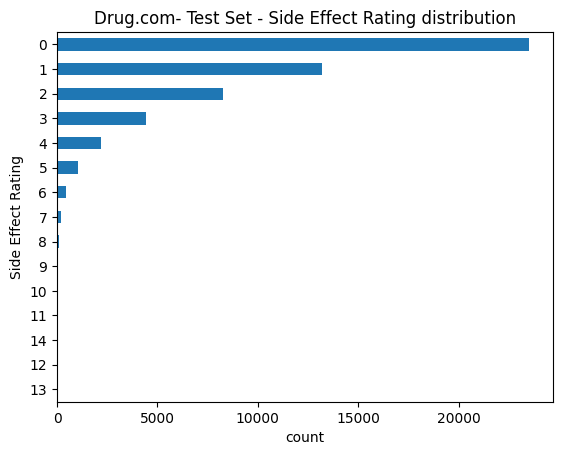

In [ ]:
def preprocess_text_review(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize on spaces
    tokens = text.split()
    return tokens

# Drop some columns and apply preprocessing function into review column
df_drugs_test['new_review'] = df_drugs_test['review'].apply(preprocess_text_review)

#Counting the side effect frequency in the review and get the total number
def CounterReview(text):
    counter = Counter(text)
    occurrences = sum(counter[v] for v in side_effect)
    return occurrences
#add new column for side effect evaluation based on review
df_drugs_test['SideRating'] = df_drugs_test['new_review'].apply(CounterReview)

df_drugs_test['SideRating'].value_counts().sort_values().plot(kind='barh')
plt.title("Drug.com- Test Set - Side Effect Rating distribution")
plt.xlabel("count")
plt.ylabel("Side Effect Rating")
plt.show( )

In [ ]:
# Counting Original side effect rating
#print(df_webmd['SideRating'].value_counts())

# Create new numerical column for side effect rating to do the binary classification
df_drugs_train['SideRating_binary'] = np.where(df_drugs_train['SideRating'] <= 0, 0,
                                           np.where(df_drugs_train['SideRating'] < 3, 1, 2))

df_drugs_train['SideRating_binary'].value_counts()

SideRating_binary
0    70474
1    63961
2    25963
Name: count, dtype: int64

In [ ]:
# Create new numerical column for side effect rating to do the binary classification
df_drugs_test['SideRating_binary'] = np.where(df_drugs_test['SideRating'] <= 0, 0,
                                           np.where(df_drugs_test['SideRating'] < 3, 1, 2))

df_drugs_test['SideRating_binary'].value_counts()

SideRating_binary
0    23527
1    21464
2     8480
Name: count, dtype: int64

In [ ]:
# Check the data types of each column
data_types = df_drugs_train.dtypes

# Separate continuous and categorical features
numeric_features = []
test = []
categorical_features = []

for column, dtype in data_types.items ():
    if dtype == 'string':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

# Print
print("numeric_features:")
print(numeric_features)
print("\nCategorical Features:")
print(categorical_features)

numeric_features:
['Unnamed: 0', 'rating', 'usefulCount', 'rating_binary', 'new_review', 'SideRating', 'SideRating_binary']

Categorical Features:
['drugName', 'condition', 'review', 'date']


In [ ]:
#determine the classification
numeric_features = ['rating', 'usefulCount', 'rating_binary']
categorical_features = ['drugName', 'condition', 'review']

#pick the test and train set
X_df_drugs_train = df_drugs_train.drop(columns = [ "SideRating_binary" ], axis=1)
y_df_drugs_train = df_drugs_train["SideRating_binary"].copy()

X_df_drugs_test = df_drugs_test.drop(columns = [ "SideRating_binary" ], axis=1)
y_df_drugs_test = df_drugs_test["SideRating_binary"].copy()

print(X_df_drugs_train.shape)
print(X_df_drugs_test.shape)
print(y_df_drugs_train.shape)
print(y_df_drugs_test.shape)

#transform column from numerical and category by scaler and onehotendcoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

(160398, 10)
(53471, 10)
(160398,)
(53471,)


Train Accuracy: 0.9999581672287422
Test Accuracy: 0.6559988952291711
RMSE score: 0.42269764068119675
Cohen's Kappa Score: 0.35618670689419996


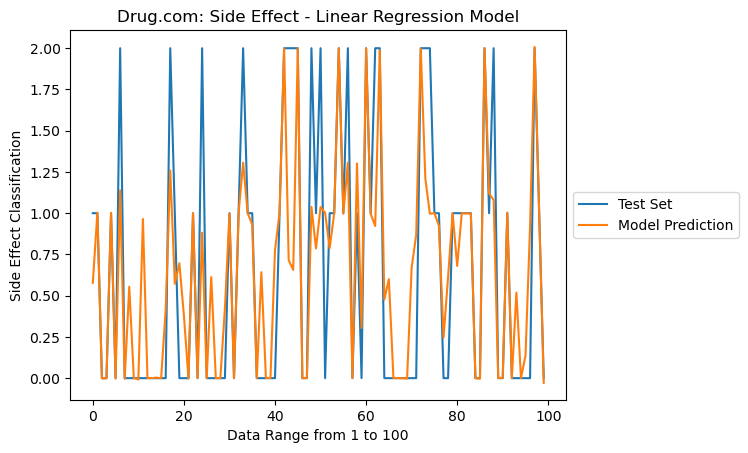

In [ ]:
# Develop the model by linear regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', LinearRegression())])
# develop the model based on train set
model_pipeline.fit(X_df_drugs_train, y_df_drugs_train)

# calculate the accuracy of train set
train_accuracy = model_pipeline.score(X_df_drugs_train, y_df_drugs_train)

# calculate the accuracy of test set
test_accuracy = model_pipeline.score(X_df_drugs_test, y_df_drugs_test)

# develop the prediction based on test set
Y_predict_drug = model_pipeline.predict(X_df_drugs_test)

# calculate Root Mean Square Error that indicate the average difference between values predicted by a model and the actual values
rmse = sqrt(mean_squared_error(y_df_drugs_test, Y_predict_drug))

#Cohen suggested the Kappa result be interpreted as follows:
#values ≤ 0 as indicating no agreement and
#0.01–0.20 as none to slight,
#0.21–0.40 as fair,
#0.41– 0.60 as moderate,
#0.61–0.80 as substantial, and
#0.81–1.00 as almost perfect agreement.

kappa = cohen_kappa_score(y_df_drugs_test.transpose().tolist(), list(map(lambda x: int(x), Y_predict_drug.transpose().tolist())))
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("RMSE score:", rmse)
print("Cohen's Kappa Score:", kappa)

# graph show the prediction and test model
plt.plot(range(100), y_df_drugs_test[:100], label = "Test Set")
plt.plot(range(100), Y_predict_drug[:100], label = "Model Prediction")
plt.title('Drug.com: Side Effect - Linear Regression Model')
plt.xlabel('Data Range from 1 to 100')
plt.ylabel('Side Effect Classification')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The Drug.com results show a train accuracy of 99.99%, a test accuracy of 65%, an RMSE score of 42%, and a Cohen's Kappa Score of 35%. The high train accuracy indicates overfitting, while the RMSE score suggests a 42% difference between predicted and actual values. The Cohen's Kappa score reflects fair reliability of the testing model. The accompanying line graph titled "Drug: Side Effect - Linear Regression Model" compares test set data (blue line) and model predictions (orange line) across a data range from 1 to 100, with side effect classifications from 0.0 to 2.0. Both lines fluctuate significantly, with numerous peaks and troughs that often do not align, indicating variability and highlighting the model's prediction accuracy.

##Web MD

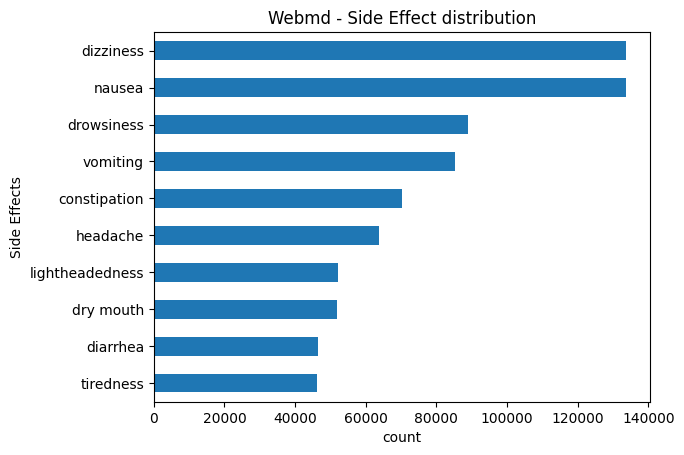

In [ ]:
# preprocessing side_effects string
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s,]', ' ', text)
    # Tokenize on spaces
    tokens = text.split(',')
    #tokens.pop()
    k = [x.strip() for x in tokens]
    #k = [x.strip() for x in tokens if len(x) < 100]
    return k

# Drop some columns and apply preprocessing function into sides column
df_webmd['New_Sides'] = df_webmd['Sides'].apply(preprocess_text)


#slipt the sides into another rows and data distribution
df_webmd6=df_webmd.explode('New_Sides')
df_webmd6['New_Sides'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Webmd - Side Effect distribution")
plt.xlabel("count")
plt.ylabel("Side Effects")
plt.show( )

#call the sides list
side_effect = list(df_webmd6['New_Sides'].value_counts().keys())

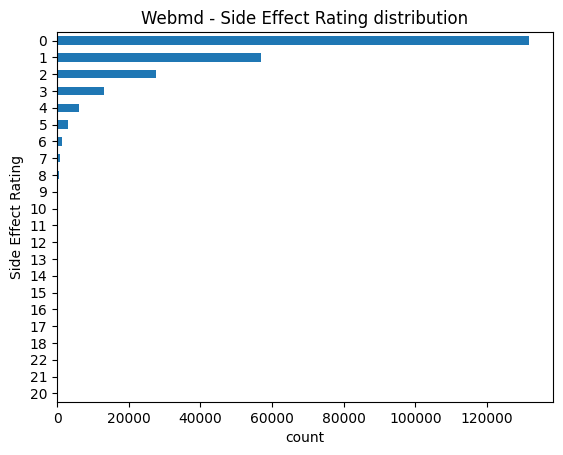

In [ ]:
def preprocess_text_review(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize on spaces
    tokens = text.split()
    return tokens

# Drop some columns and apply preprocessing function into review column
df_webmd['New_Reviews'] = df_webmd['Reviews'].apply(preprocess_text_review)

#Counting the side effect frequency in the review and get the total number
def CounterReview(text):
    counter = Counter(text)
    occurrences = sum(counter[v] for v in side_effect)
    return occurrences
#add new column for side effect evaluation base on review
df_webmd['SideRating'] = df_webmd['New_Reviews'].apply(CounterReview)

df_webmd['SideRating'].value_counts().sort_values().plot(kind='barh')
plt.title("Webmd - Side Effect Rating distribution")
plt.xlabel("count")
plt.ylabel("Side Effect Rating")
plt.show( )

In [ ]:
# Counting Original side effect rating
print(df_webmd['SideRating'].value_counts())

# Create new numerical column for side effect rating to do the binary classification
df_webmd['SideRating_binary'] = np.where(df_webmd['SideRating'] <= 0, 0,
                                           np.where(df_webmd['SideRating'] < 3, 1, 2))

df_webmd['SideRating_binary'].value_counts()

SideRating
0     131794
1      56966
2      27712
3      13021
4       6177
5       3104
6       1477
7        796
8        411
9        268
10       143
11        68
12        47
13        29
14        21
15        11
16         4
17         4
21         2
22         2
18         2
20         1
Name: count, dtype: int64


SideRating_binary
0    131794
1     84678
2     25588
Name: count, dtype: int64

In [ ]:
# Check the data types of each column
data_types = df_webmd.dtypes

# Separate continuous and categorical features
numeric_features = []
test = []
categorical_features = []

for column, dtype in data_types.items ():
    if dtype == 'string':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

# Print
print("numeric_features:")
print(numeric_features)
print("\nCategorical Features:")
print(categorical_features)

numeric_features:
['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'overall_rating', 'overall_rating_binary', 'New_Sides', 'New_Reviews', 'SideRating', 'SideRating_binary']

Categorical Features:
['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']


In [ ]:
#determine the classification
numeric_features = ['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'overall_rating']
categorical_features = ['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

#pick the test and train set
X_webmd = df_webmd.drop(columns = [ "SideRating_binary" ], axis=1)
y_webmd_SideRating_binary = df_webmd["SideRating_binary"].copy()
X_train_webmd, X_test_webmd, y_train_webmd_SideRating_binary, y_test_webmd_SideRating_binary = train_test_split(X_webmd, y_webmd_SideRating_binary, random_state=0, test_size=0.2)
print(X_train_webmd.shape)
print(X_test_webmd.shape)
print(y_train_webmd_SideRating_binary.shape)
print(y_test_webmd_SideRating_binary.shape)

#transform column from numerical and category by scaler and onehotendcoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

(193648, 17)
(48412, 17)
(193648,)
(48412,)


In [ ]:
#determine the classification
numeric_features = ['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'overall_rating']
categorical_features = ['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

#pick the test and train set
X_webmd = df_webmd.drop(columns = [ "SideRating_binary" ], axis=1)
y_webmd_SideRating_binary = df_webmd["SideRating_binary"].copy()
X_train_webmd, X_test_webmd, y_train_webmd_SideRating_binary, y_test_webmd_SideRating_binary = train_test_split(X_webmd, y_webmd_SideRating_binary, random_state=0, test_size=0.2)
print(X_train_webmd.shape)
print(X_test_webmd.shape)
print(y_train_webmd_SideRating_binary.shape)
print(y_test_webmd_SideRating_binary.shape)

#transform column from numerical and category by scaler and onehotendcoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

(193648, 17)
(48412, 17)
(193648,)
(48412,)


Train Accuracy: 0.9999100279279759
Test Accuracy: 0.4113273258050061
RMSE score: 0.5193170377176829
Cohen's Kappa Score: 0.24007416161256623


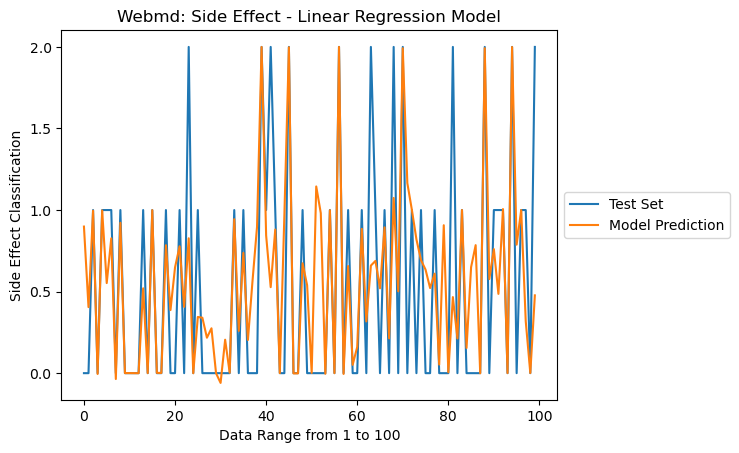

In [ ]:
# Develop the model by linear regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', LinearRegression())])
# develop the model based on train set
model_pipeline.fit(X_train_webmd, y_train_webmd_SideRating_binary)

# calculate the accuracy of train set
train_accuracy = model_pipeline.score(X_train_webmd, y_train_webmd_SideRating_binary)
# calculate the accuracy of test set
test_accuracy = model_pipeline.score(X_test_webmd, y_test_webmd_SideRating_binary)
# develop the prediction based on test set
Y_predict_webmd = model_pipeline.predict(X_test_webmd)
# calculate Root Mean Square Error that indicate the average difference between values predicted by a model and the actual values
rmse = sqrt(mean_squared_error(y_test_webmd_SideRating_binary, Y_predict_webmd))

#Cohen suggested the Kappa result be interpreted as follows:
#values ≤ 0 as indicating no agreement and
#0.01–0.20 as none to slight,
#0.21–0.40 as fair,
#0.41– 0.60 as moderate,
#0.61–0.80 as substantial, and
#0.81–1.00 as almost perfect agreement.

kappa = cohen_kappa_score(y_test_webmd_SideRating_binary.transpose().tolist(), list(map(lambda x: int(x), Y_predict_webmd.transpose().tolist())))
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("RMSE score:", rmse)
print("Cohen's Kappa Score:", kappa)


# graph show the prediction and test model
plt.plot(range(100), y_test_webmd_SideRating_binary[:100], label = "Test Set")
plt.plot(range(100), Y_predict_webmd[:100], label = "Model Prediction")
plt.title('Webmd: Side Effect - Linear Regression Model')
plt.xlabel('Data Range from 1 to 100')
plt.ylabel('Side Effect Classification')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



The WebMD results show a train accuracy of 99.99%, a test accuracy of 41.13%, an RMSE score of 51.93%, and a Cohen's Kappa Score of 24.87%. The high train accuracy indicates overfitting, while the RMSE score suggests a 50% difference between predicted and actual values. The Cohen's Kappa score reflects fair reliability of the testing model. The accompanying line graph titled "Webmd: Side Effect - Linear Regression Model" compares test set data (blue line) and model predictions (orange line) across a data range from 1 to 100, with side effect classifications from 0.0 to 2.0. Both lines fluctuate significantly, with numerous peaks and troughs that often do not align, indicating variability and highlighting the model's predictio

##Deep Learning Methods

##Recurrent Neural Networks (RNN)

An RNN is a type of neural network specially designed to handle sequences of data, like time series, text, audio signals, or any other sequential data. Unlike traditional feedforward neural networks, which process input data in one direction, an RNN has connections that loop back on themselves. This gives RNNs a form of memory which helps them to remember previous inputs in the sequence. This unique structure makes them suitable for tasks where temporal dynamics and the order of inputs are important (Luay, 2023).

However, RNNs are known to suffer from challenges like the vanishing and exploding gradient problems, especially when dealing with long sequences. This makes training deep RNNs challenging and can lead to less-than-optimal performance. As a solution, variations of RNNs like Gated Recurrent Units (GRU) Long Short-Term Memory (LSTM) were introduced (Luay, 2023).

GRU's and LSTM's make use of memory cells to store the activation value of previous words in the long sequences. Both methods use gates, which are used for controlling the flow of information in the network. Gates are capable of learning which inputs in the sequence are important and store their information in the memory unit. They can pass the information in long sequences and use them to make predictions (Pedamallu, 2020).

GRU Model Architecture (Zargar, 2021)

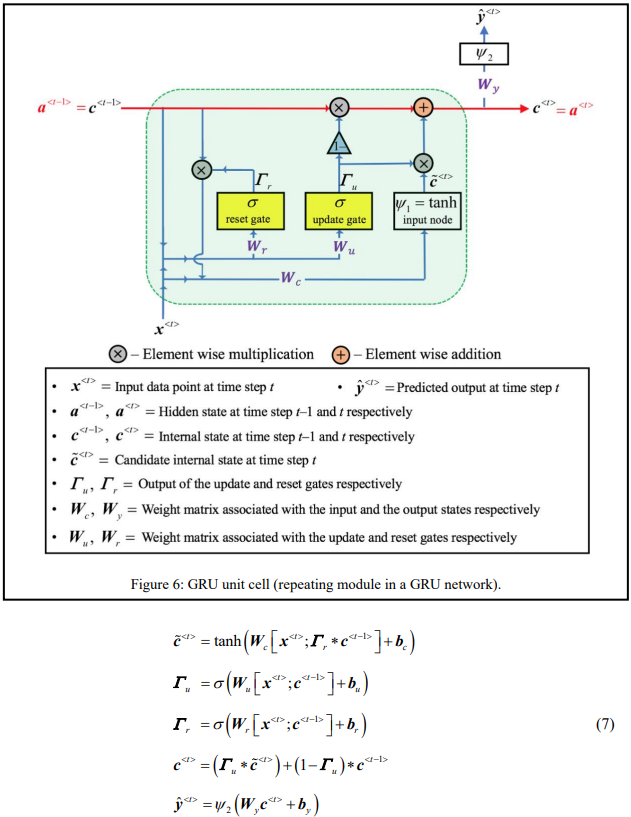

LSTM Model Architecture (Zagar, 2021)

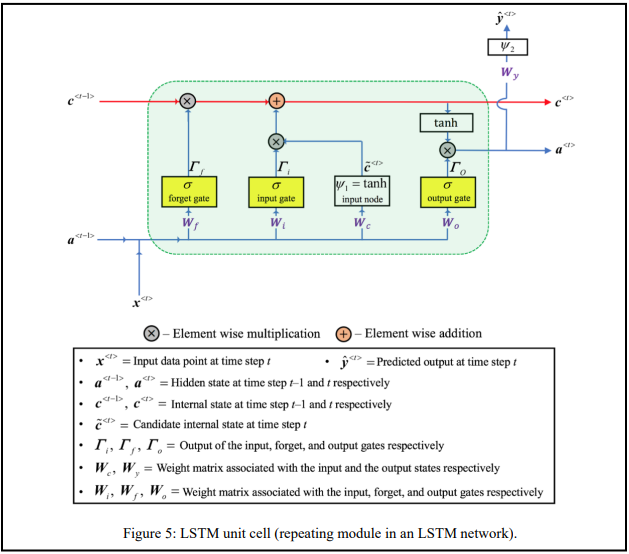

##Drug Effectivenss and Satisfaction Analysis using RNN Gated Recurrent Unit (GRU)

To develop GRU models, we follow a series of steps including tokenizing text, converting text to integer sequences, padding sequences, and splitting the data into training and test sets. For the GRU-based RNN model, we calculate class weights, define the model with dropout layers, train it with class weights, and evaluate it on test data, saving multiple versions to prevent crashes.

For drug.com, we use a model with 7,897,879 trainable parameters. The model's training performance improves significantly, with training loss decreasing from 1.1004 to 0.3009 and accuracy increasing from 0.3089 to 0.8946. Validation loss decreased from 1.0812 to 0.4705, and validation accuracy improves from 0.6641 to 0.8393. The final test results showed a test loss of 0.4883 and a test accuracy of 0.8331. Similarly, the Webmd model with 15,324,079 parameters shows improvements with training loss decreasing from 1.0999 to 0.2641, and accuracy increasing from 0.3377 to 0.9021. Validation loss improves from 1.1085 to 1.0258, and validation accuracy from 0.2254 to 0.7028, with a final test loss of 1.0205 and test accuracy of 0.7046.

Lower loss values and higher accuracy values indicate better model performance. After training, we evaluate the model on a test set; low test loss and high accuracy means the model generalizes well to new data. High test loss or low accuracy suggests overfitting or inadequate pattern capture, requiring adjustments to the model's architecture, hyperparameters, or data preprocessing.

We generate classification reports and confusion matrices using sklearn and pickle. For drug.com, the model achieves an overall accuracy of 83.31%, performing well in Positive and Negative classes but struggling with the Neutral class. For Webmd, the model achieves an overall accuracy of 70.5%, facing challenges in classifying Negative and Neutral classes. Both models demonstrate efficient prediction times, classifying instances in approximately 31 to 35 milliseconds per step.

##Sentiment Analysis using GRU (Drugs.com)

In [ ]:
# Prepare data for the Recurrent Neural Network: Tokenize Text, Convert text to sequences of integers, Pad sequences and Split
# the data into Train and Test datasets

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_drugs_train['clean_text'])
tokenizer.fit_on_texts(df_drugs_test['clean_text'])

# Calculate vocab_size
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(df_drugs_train['clean_text'])
X_test_sequences = tokenizer.texts_to_sequences(df_drugs_test['clean_text'])

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in X_sequences)
X_train= pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')
X_temp = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Get labels
y_train = df_drugs_train['rating_binary']
y_temp = df_drugs_test['rating_binary']

# Split the data into training, testing, and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(160398, 1868)
(26736, 1868)
(160398,)
(26736,)
(26735, 1868)
(26735,)


In [ ]:
# Use RNN Gated Recurrent Unit (GRU) as the deep neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pickle
from keras.utils import to_categorical

# Get the unique class labels and their corresponding indices
unique_labels = np.unique(y_train)
class_indices = np.arange(len(unique_labels))

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=class_indices, y=y_train)
class_weight_dict = dict(zip(class_indices, class_weights))

# Assuming y_train, y_val, and y_test are integer labels
num_classes = 3  # Number of classes in your classification task
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Define the model with dropout layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length),
    GRU(128, return_sequences=True),
    Dropout(0.5),  # Add dropout layer
    GRU(128),
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
                    class_weight=class_weight_dict, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save model architecture
with open("model_architecture_drugs.json", "w") as json_file:
    json_file.write(model.to_json())

# Save model weights
model.save_weights("model_weights_drugs.h5")

# Save training history
with open("history_drugs.pkl", "wb") as file:
    pickle.dump(history.history, file)

# Save class weights
with open("class_weights_drugs.pkl", "wb") as file:
    pickle.dump(class_weight_dict, file)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1868, 100)         7712000   
                                                                 
 gru (GRU)                   (None, 1868, 128)         88320     
                                                                 
 dropout (Dropout)           (None, 1868, 128)         0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 7899779 (30.14 MB)
Trainable params: 78997

We developed a detailed summary of a sequential neural network model for drug.com, its training progress over ten epochs, and the final test results. The model comprises an embedding layer, two GRU layers, two dropout layers, and a dense layer, totaling 7,897,879 trainable parameters. During training, the model's performance improved significantly, with training loss decreasing from 1.1004 to 0.3009 and accuracy increasing from 0.3089 to 0.8946. Similarly, validation loss decreased from 1.0812 to 0.4705, and validation accuracy improved from 0.6641 to 0.8393. The final test results show a test loss of 0.4883 and a test accuracy of 0.8331, indicating the model's effective learning and generalization capabilities.








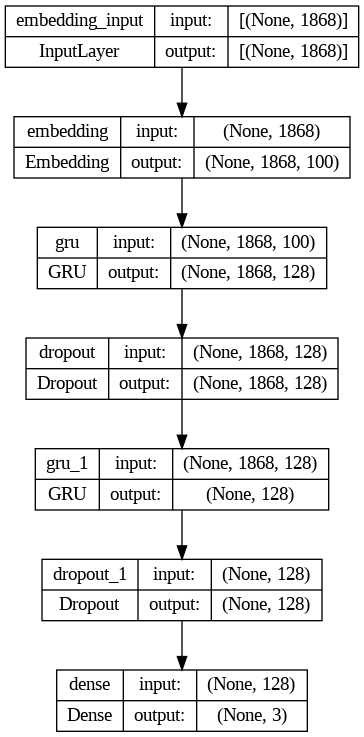

In [ ]:
# Use RNN Gated Recurrent Unit (GRU) as the deep neural network

# Load JSON model architecture
with open("/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/model_architecture_drugs.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Load model from JSON
loaded_model = model_from_json(loaded_model_json)

plot_model(loaded_model, to_file='model_plot_drugs.png', show_shapes=True, show_layer_names=True)

For drug.com, the architecture of a sequential neural network model starts with an input layer for data shaped (None, 1868), followed by an embedding layer that outputs data shaped (None, 1868, 100). This is processed by a GRU layer, transforming the output to (None, 1868, 128), followed by a dropout layer to prevent overfitting. Another GRU layer further processes the data to (None, 128), followed by a second dropout layer. The final layer is a dense layer that outputs data shaped (None, 3), indicating classification into three categories. The diagram shows the sequential flow and transformation of data through each layer.

In [ ]:
# Load the history from the model (once it's run so you don't have to rerun it)

# Specify the path to the pickle file
pickle_file_path = '/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/history_drugs.pkl'

# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']
# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.30891284346580505, 0.3134016692638397, 0.308326780796051, 0.2898228168487549, 0.48908963799476624, 0.7026147246360779, 0.7610693573951721, 0.8179528713226318, 0.8645806312561035, 0.8945560455322266]
[0.6641480922698975, 0.08846081793308258, 0.24739105999469757, 0.24739105999469757, 0.7203291654586792, 0.6840845346450806, 0.743781566619873, 0.8009725213050842, 0.8087151646614075, 0.8392743468284607]
[1.100433349609375, 1.0995866060256958, 1.0993671417236328, 1.0993069410324097, 1.020063042640686, 0.7658360004425049, 0.6306403875350952, 0.5024551749229431, 0.3915371298789978, 0.3009145259857178]
[1.0811859369277954, 1.102075219154358, 1.099229097366333, 1.0927213430404663, 0.6992812752723694, 0.7091437578201294, 0.6372962594032288, 0.5031702518463135, 0.5253190398216248, 0.47053903341293335]


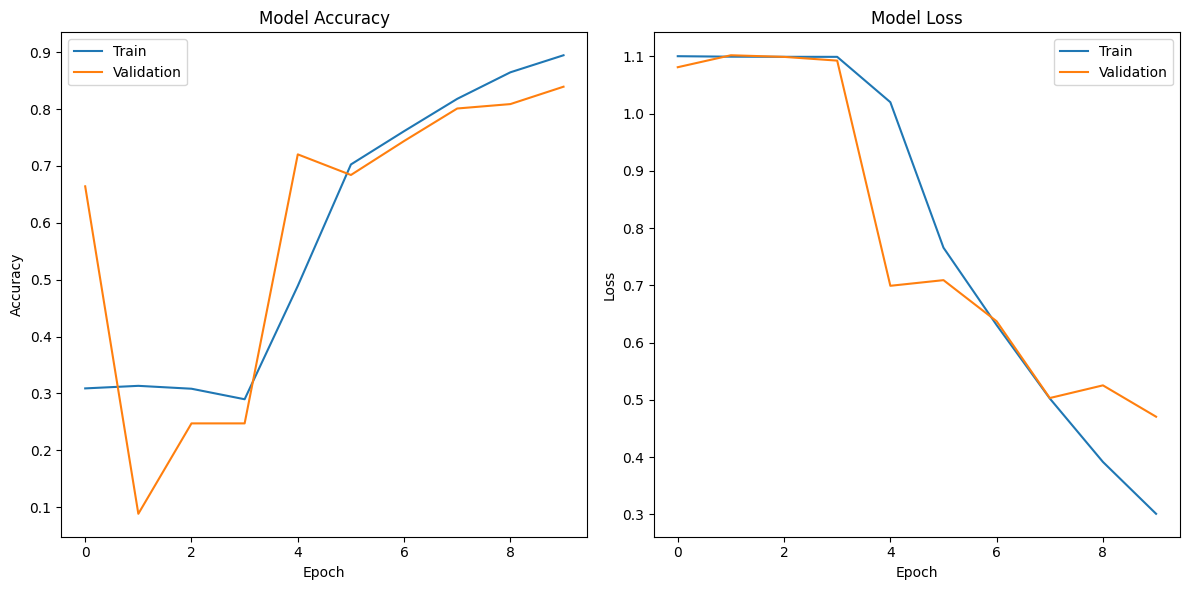

In [ ]:
#Plot Model Accuracy and Model Loss

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

The drug.com accuracy plot on the left side reveals that training accuracy starts low and steadily increases to about 0.9 by the 10th epoch, while validation accuracy also improves, stabilizing around 0.8 after an initial drop. The drug.com loss plot on the right side indicates that both training and validation loss start high (around 1.1) and decrease over time, with training loss dropping to approximately 0.2 and validation loss stabilizing around 0.4 by the 10th epoch. These trends suggest that the model is converging well, with improving accuracy and decreasing loss for both datasets.

836/836 [==============================] - 43s 51ms/step - loss: 0.4883 - accuracy: 0.8331
Test Loss: 0.48825803399086
Test Accuracy: 0.8331089019775391
836/836 [==============================] - 40s 48ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6814
           1       0.40      0.70      0.51      2428
           2       0.94      0.87      0.91     17494

    accuracy                           0.83     26736
   macro avg       0.73      0.78      0.74     26736
weighted avg       0.87      0.83      0.85     26736

Accuracy of the Model: 83.3%


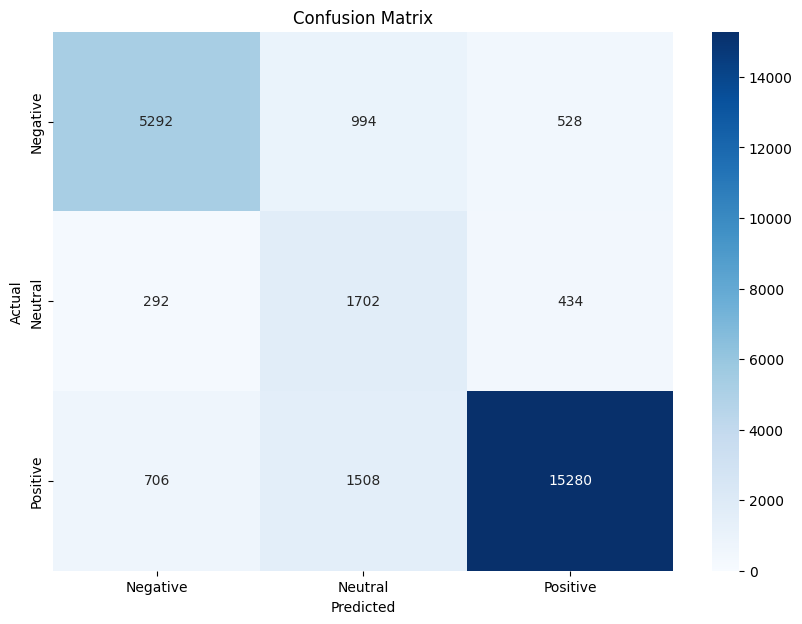

In [ ]:
# Output Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Map integer labels to class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Load the model history
with open("history_drugs.pkl", "rb") as file:
    history = pickle.load(file)

# Load the class weights
with open("class_weights_drugs.pkl", "rb") as file:
    class_weight_dict = pickle.load(file)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot classification report
print(classification_report(y_test, y_pred_classes))

# Print accuracy
print("Accuracy of the Model: {:.1f}%".format(accuracy_score(y_test, y_pred_classes) * 100))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The Drug.com model includes a Classification Report and a Confusion Matrix, along with details on test accuracy and loss. The Classification Report includes precision, recall, F1-score, and support metrics for three classes: Negative, Neutral, and Positive. For the Negative class, the precision is 0.84, recall is 0.78, and F1-score is 0.81, with support of 6,814. The Neutral class has a precision of 0.40, recall of 0.70, and F1-score of 0.51, with support of 2,421. The Positive class shows a precision of 0.94, recall of 0.87, and F1-score of 0.91, with support of 17,494. The overall model accuracy is 83.31%. The macro average precision, recall, and F1-score are 0.73, 0.78, and 0.74, respectively, while the weighted averages are 0.87, 0.83, and 0.85.

The Confusion Matrix visualizes the Drug.com model's performance by showing the actual vs. predicted values for each class. For the Negative class, 5,292 instances were correctly classified, 994 were misclassified as Neutral, and 528 as Positive. For the Neutral class, 292 were misclassified as Negative, 1,702 correctly classified, and 434 as Positive. For the Positive class, 706 were misclassified as Negative, 1,508 as Neutral, and 15,280 correctly classified. Overall, the model performs well for the Positive and Negative classes but has more difficulty accurately classifying the Neutral class.








In [ ]:
# Testing the model on text reviews

def predict_sentiment(text):
    cleaned_text = tokenizer.texts_to_sequences([preprocess_text(text)])
    maxlen = max(len(seq) for seq in X_sequences)
    padded_text = pad_sequences(cleaned_text, maxlen=maxlen, padding='post')
    probabilities = model.predict(padded_text)[0]  # Get class probabilities
    predicted_class = np.argmax(probabilities)  # Get the index of the class with the highest probability
    if predicted_class == 0:
        return "Negative"
    elif predicted_class == 1:
        return "Neutral"
    else:
        return "Positive"

# Test the function
print(predict_sentiment("The drug is expensive but it is worth every cent."))
print(predict_sentiment("The drug is cheap but it doesn't perform well."))
print(predict_sentiment("The drug gives me horrible side effects, do not take it."))

1/1 [==============================] - 0s 35ms/step
Positive
1/1 [==============================] - 0s 31ms/step
Neutral
1/1 [==============================] - 0s 31ms/step
Negative


##Sentiment Analysis using GRU (WebMD)

In [ ]:
# Prepare data for the Recurrent Neural Network: Tokenize Text, Convert text to sequences of integers, Pad sequences and Split
# the data into Train and Test datasets

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_webmd['clean_text'])

# Calculate vocab_size
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(df_webmd['clean_text'])

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in X_sequences)
X = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')
y = df_webmd['overall_rating_binary']

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(224087, 518)
(28011, 518)
(224087,)
(28011,)
(28011, 518)
(28011,)


In [ ]:
# Use RNN Gated Recurrent Unit (GRU) as the deep neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pickle

# Get the unique class labels and their corresponding indices
unique_labels = np.unique(y_train)
class_indices = np.arange(len(unique_labels))

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=class_indices, y=y_train)
class_weight_dict = dict(zip(class_indices, class_weights))

# Assuming y_train, y_val, and y_test are integer labels
num_classes = 3  # Number of classes in your classification task
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Define the model with dropout layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length),
    GRU(128, return_sequences=True),
    Dropout(0.5),  # Add dropout layer
    GRU(128),
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
                    class_weight=class_weight_dict, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save model architecture
with open("model_architecture.json", "w") as json_file:
    json_file.write(model.to_json())

# Save model weights
model.save_weights("model_weights.h5")

# Save training history
with open("history.pkl", "wb") as file:
    pickle.dump(history.history, file)

# Save class weights
with open("class_weights.pkl", "wb") as file:
    pickle.dump(class_weight_dict, file)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 518, 100)          15114700  
                                                                 
 gru_10 (GRU)                (None, 518, 128)          88320     
                                                                 
 dropout_2 (Dropout)         (None, 518, 128)          0         
                                                                 
 gru_11 (GRU)                (None, 128)               99072     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 15302479 (58.37 MB)
Trainable params: 15

We also developed details of a sequential neural network model for Webmd, showing its layer structure, training progress over ten epochs, and final test results. The model includes an embedding layer, two GRU layers, two dropout layers, and a dense layer, with a total of 15,324,079 parameters, all of which are trainable. During the training process, the model's loss and accuracy metrics are recorded for both training and validation sets. Initially, the training loss starts at 1.0999 with an accuracy of 0.3377, and the validation loss at 1.1085 with an accuracy of 0.2254. Over the epochs, the training loss decreases significantly to 0.2641, and accuracy improves to 0.9021. The validation loss also shows improvement, decreasing to 1.0258, and the validation accuracy increases to 0.7028. The final test results indicate a test loss of 1.0205 and a test accuracy of 0.7046, demonstrating the model's learning and generalization capabilities throughout the training process.

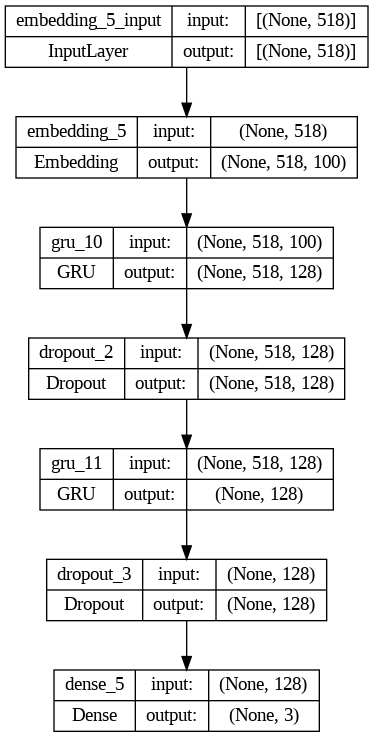

In [ ]:
# Use RNN Gated Recurrent Unit (GRU) as the deep neural network

from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

 For Webmd, the architecture of a sequential neural network model starts with an input layer for data shaped (None, 518), followed by an embedding layer that outputs data shaped (None, 518, 100). This is processed by a GRU layer, transforming it to (None, 518, 128), followed by a dropout layer to prevent overfitting. Another GRU layer further reduces the data to (None, 128), followed by another dropout layer. The final layer is a dense layer that outputs data shaped (None, 3), indicating classification into three categories. The diagram illustrates the sequential flow of data through each layer.

In [ ]:
#When interpreting the loss and accuracy values for your GRU model:

#Loss: Lower values indicate better performance. During training, you aim to minimize the loss.
#Accuracy: Higher values indicate better performance. You want accuracy to be as close to 1 (or 100%) as possible.
#After training your model, you evaluate its performance on a separate test set. The reported test loss and accuracy provide insights into how well your model generalizes to unseen data. If the test loss is low and the accuracy is high, it indicates that your model has learned meaningful patterns from the training data and can make accurate predictions on new data. On the other hand, if the test loss is high or the accuracy is low, it suggests that your model may be overfitting to the training data or that it is not capturing the underlying patterns effectively. In such cases, you may need to revisit your model architecture, hyperparameters, or data preprocessing steps to improve performance.

In [ ]:
# Load the model (once it's run so you don't have to rerun it)

# Specify the path to the pickle file
pickle_file_path = '/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/history.pkl'

# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']
# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.313663512468338, 0.31869474053382874, 0.3194989860057831, 0.3133767247200012, 0.46177008748054504, 0.6972593069076538, 0.7607887983322144, 0.8234890699386597, 0.8739759922027588, 0.9084277749061584]
[0.08846081793308258, 0.08846081793308258, 0.6641480922698975, 0.14628763496875763, 0.7226108312606812, 0.7217879295349121, 0.7913596630096436, 0.8063213229179382, 0.7973443269729614, 0.8461193442344666]
[1.1004400253295898, 1.0995697975158691, 1.1024372577667236, 1.1127560138702393, 1.029301404953003, 0.7838959097862244, 0.6366354823112488, 0.4945962131023407, 0.371072918176651, 0.2766968607902527]
[1.1197103261947632, 1.102858304977417, 1.0794870853424072, 1.1266632080078125, 0.6924347281455994, 0.6306230425834656, 0.5109401345252991, 0.5170294642448425, 0.570306122303009, 0.48587435483932495]


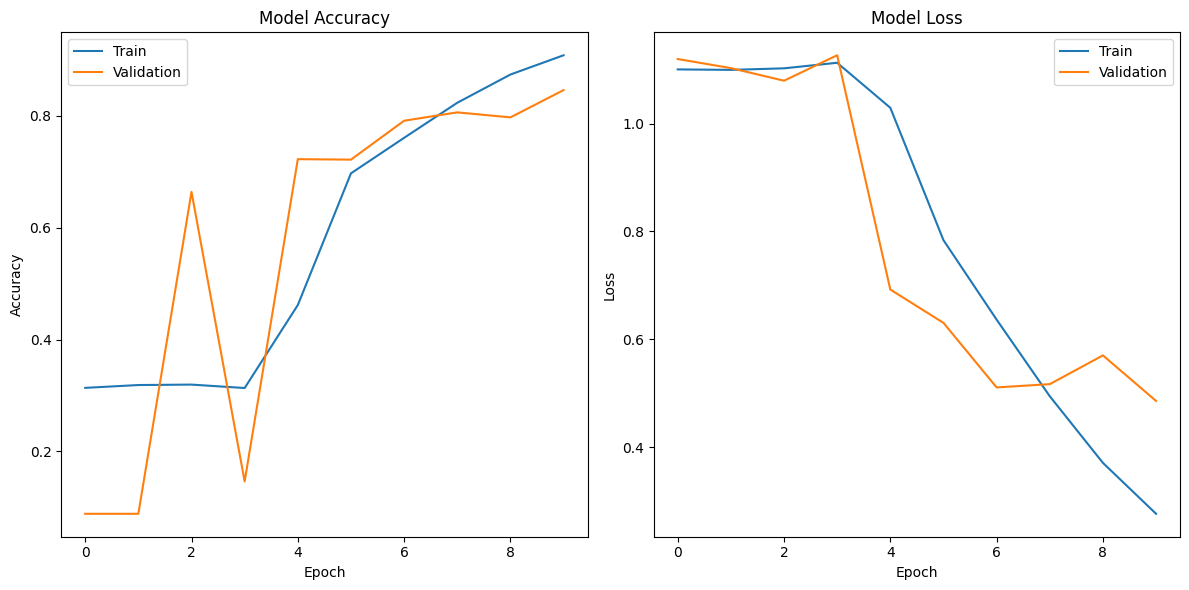

In [ ]:
# Plot Model Accuracy and Model Loss

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

The Webmd accuracy plot on the left side shows that the training accuracy starts low and gradually improves, reaching around 0.9 by the ninth epoch, while the validation accuracy begins very low, fluctuates significantly, and eventually stabilizes around 0.8. The Webmd loss plot on the right side indicates that both training and validation loss start high at approximately 1.0, but decrease over time, with the training loss dropping steadily to below 0.3 and the validation loss reaching around 0.5 by the ninth epoch.

876/876 [==============================] - 15s 17ms/step - loss: 1.0205 - accuracy: 0.7046
Test Loss: 1.0205129384994507
Test Accuracy: 0.7045803666114807
876/876 [==============================] - 14s 16ms/step
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      5080
           1       0.47      0.63      0.54      6262
           2       0.90      0.76      0.82     16669

    accuracy                           0.70     28011
   macro avg       0.64      0.67      0.65     28011
weighted avg       0.74      0.70      0.72     28011

Accuracy of the Model: 70.5%


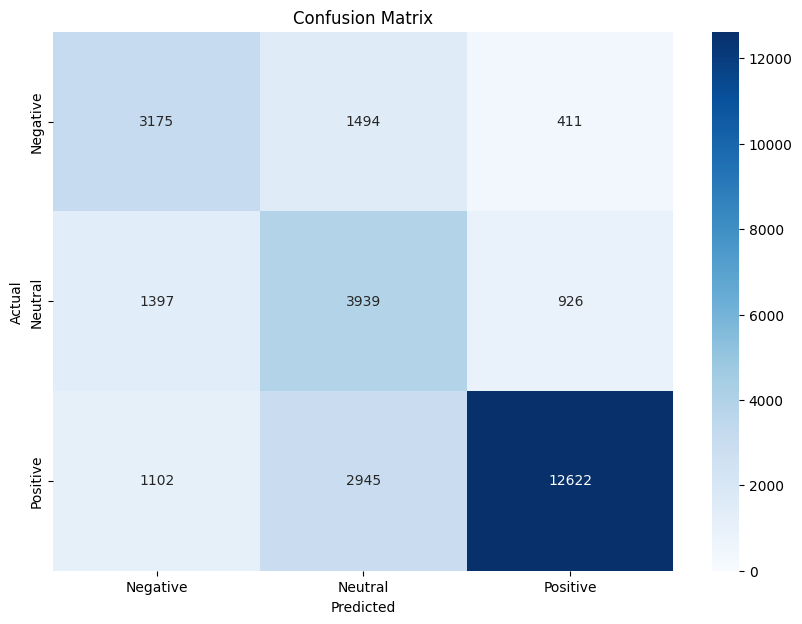

In [ ]:
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Map integer labels to class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Load the model history
with open("history.pkl", "rb") as file:
    history = pickle.load(file)

# Load the class weights
with open("class_weights.pkl", "rb") as file:
    class_weight_dict = pickle.load(file)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot classification report
print(classification_report(y_test, y_pred_classes))

# Print accuracy
print("Accuracy of the Model: {:.1f}%".format(accuracy_score(y_test, y_pred_classes) * 100))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The webmd model includes a Classification Report and a Confusion Matrix, along with test accuracy and loss details. The Classification Report provides precision, recall, F1-score, and support metrics for three classes: Negative, Neutral, and Positive. The model achieved an overall accuracy of 70.5% with a test loss of 1.0205. For the Negative class, precision is 0.56, recall is 0.62, and F1-score is 0.59, with support of 5080 instances. The Neutral class has a precision of 0.47, recall of 0.63, and F1-score of 0.54, with support of 6262 instances. The Positive class shows a precision of 0.90, recall of 0.76, and F1-score of 0.82, with support of 16669 instances. The macro averages for precision, recall, and F1-score are 0.64, 0.67, and 0.65, respectively, while the weighted averages are 0.74, 0.70, and 0.72.

The Confusion Matrix visualizes the Webmd model's performance, displaying the actual versus predicted values for each class. For the Negative class, 3175 instances were correctly classified, 1494 were misclassified as Neutral, and 411 as Positive. For the Neutral class, 1397 were misclassified as Negative, 3939 correctly classified, and 926 as Positive. For the Positive class, 1102 were misclassified as Negative, 2945 as Neutral, and 12622 correctly classified.

In [ ]:
# Testing the model on text reviews

def predict_sentiment(text):
    cleaned_text = tokenizer.texts_to_sequences([preprocess_text(text)])
    maxlen = max(len(seq) for seq in X_sequences)
    padded_text = pad_sequences(cleaned_text, maxlen=maxlen, padding='post')
    probabilities = model.predict(padded_text)[0]  # Get class probabilities
    predicted_class = np.argmax(probabilities)  # Get the index of the class with the highest probability
    if predicted_class == 0:
        return "Negative"
    elif predicted_class == 1:
        return "Neutral"
    else:
        return "Positive"

# Test the function
print(predict_sentiment("The drug is expensive but it is worth every cent."))
print(predict_sentiment("The drug is cheap but it doesn't perform well."))
print(predict_sentiment("The drug gives me horrible side effects, do not take it."))

1/1 [==============================] - 0s 35ms/step
Positive
1/1 [==============================] - 0s 31ms/step
Neutral
1/1 [==============================] - 0s 31ms/step
Negative


##Drug Effectivenss and Satisfaction Sentiment Analysis using Long Short Term Memory

We use Keras to define and compile the model with the 'adam' optimizer and categorize the training and test sets using one-hot encoding. The model is trained with a batch size of 64 and a 10% validation set. We then calculate the loss and accuracy. To prevent data loss and system crashes, we save the model architecture, weights, training history, and class weights, and reload them to rerun the model and recalculate the accuracy and loss.

For drug.com, the model has 7,712,000 parameters, with a test loss of 0.59 and a test accuracy of 87%. The training accuracy increases to nearly 97.5% by the 9th epoch, while validation accuracy levels off around 85%. The training loss drops sharply towards zero, while validation loss fluctuates around 0.3, indicating potential overfitting.

For webmd.com, the model has 15,295,903 parameters, with a test loss of 1.15 and a test accuracy of 73.6%. The training accuracy improves to almost 95% by the 9th epoch, while validation accuracy levels off around 75%. The training loss decreases consistently to 0.2, but validation loss initially drops and then rises to about 0.8, again suggesting potential overfitting.

##Sentiment Analysis using Long Short Term Memory (Drugs.com)

In [ ]:
embedding_dim = 100
input_length=X_train.shape[1]

#define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# Compile the model (same as before)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#One Hot Encode  y_train, y_test
y_train_1h = tf.keras.utils.to_categorical(y_train, num_classes= 3)
y_test_1h = tf.keras.utils.to_categorical(y_test, num_classes= 3)

# Train the model (same as before)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model (same as before)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Extract training accuracy from history
train_accuracy = history.history['accuracy'][-1]

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1868, 100)         7712000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 3)                 303       
                                                                 
Total params: 7893203 (30.11 MB)
Trainable params: 7893203 (30.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2256/2256 [==============================] - 5410s 2s/step - loss: 0.

In [ ]:
# Save model architecture
with open("model_architecture_drugs_lstm.json", "w") as json_file:
    json_file.write(model.to_json())

# Save model weights
model.save_weights("model_weights_drugs_lstm.h5")

# Save training history
with open("history_drugs_lstm.pkl", "wb") as file:
    pickle.dump(history.history, file)

# Save class weights
with open("class_weights_drugs_lstm.pkl", "wb") as file:
    pickle.dump(class_weight_dict, file)

In [ ]:
#Load the history from the model (once it's run so you don't have to rerun it)

# Specify the path to the pickle file
pickle_file_path = '/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/history_drugs_lstm.pkl'

# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']
# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.7816470265388489, 0.8375496864318848, 0.8706271648406982, 0.9002549052238464, 0.9227684140205383, 0.9394422173500061, 0.9520982503890991, 0.9623782634735107, 0.9691045880317688, 0.975955605506897]
[0.8050498962402344, 0.8256234526634216, 0.8384663462638855, 0.84713214635849, 0.8563591241836548, 0.8569201827049255, 0.8607855439186096, 0.8639650940895081, 0.8715710639953613, 0.8695760369300842]
[0.5775584578514099, 0.4322793781757355, 0.34246745705604553, 0.270300030708313, 0.2124786227941513, 0.1680004745721817, 0.13640017807483673, 0.10887090116739273, 0.09105782955884933, 0.07163016498088837]
[0.5076772570610046, 0.4626444876194, 0.45734912157058716, 0.43853676319122314, 0.46380123496055603, 0.4861481189727783, 0.5236701369285583, 0.5235152244567871, 0.5784100294113159, 0.5905458331108093]


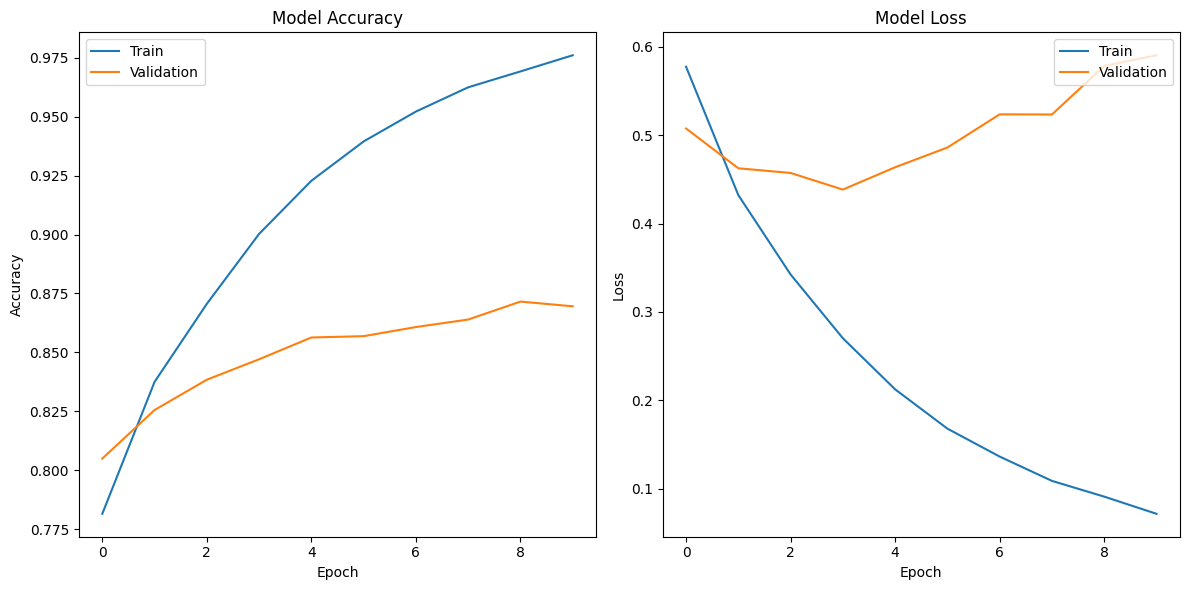

In [ ]:
#Plot Model Accuracy and Model Loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

There are two plots: Model Accuracy and Model Loss. The left plot shows that the training accuracy (blue line) steadily increases, reaching nearly 0.975 by the 9th epoch. In contrast, the validation accuracy (orange line) rises more slowly, leveling off around 0.85. The right plot shows that the training loss (blue line) drops sharply towards zero, while the validation loss (orange line) initially decreases but then fluctuates and stabilizes around 0.3. This gap between training and validation performance suggests that the model might be overfitting.

##Sentiment Analysis using Long Short Term Memory (WebMD)

In [ ]:
import tensorflow as tf
import pickle

In [ ]:
embedding_dim = 100
input_length=X_train.shape[1]

#define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# Compile the model (same as before)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#One Hot Encode  y_train, y_test
y_train_1h = tf.keras.utils.to_categorical(y_train, num_classes= 3)
y_test_1h = tf.keras.utils.to_categorical(y_test, num_classes= 3)

# Train the model (same as before)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model (same as before)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Extract training accuracy from history
train_accuracy = history.history['accuracy'][-1]

# Save model architecture
with open("model_architecture_webmd_lstm.json", "w") as json_file:
    json_file.write(model.to_json())

# Save model weights
model.save_weights("model_weights_webmd_lstm.h5")

# Save training history
with open("history_webmd_lstm.pkl", "wb") as file:
    pickle.dump(history.history, file)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 518, 100)          15114700  
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 15295903 (58.35 MB)
Trainable params: 15295903 (58.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3152/3152 [==============================] - 2218s 702ms/step - loss:

NameError: name 'class_weight_dict' is not defined

In [ ]:
#Load the history from the model (once it's run so you don't have to rerun it)

# Specify the path to the pickle file
pickle_file_path = '/content/gdrive/MyDrive/DSCI 691 Project and Assignments/Project/history_webmd_lstm.pkl'

# Load the history data from the pickle file
with open(pickle_file_path, 'rb') as file:
    history_data = pickle.load(file)

train_accuracy_history = history_data['accuracy']
val_accuracy_history = history_data['val_accuracy']
train_loss_history = history_data['loss']
val_loss_history = history_data['val_loss']
# Print the loaded data
print(train_accuracy_history)
print(val_accuracy_history)
print(train_loss_history)
print(val_loss_history)

[0.6685805916786194, 0.7323505878448486, 0.7833576202392578, 0.8258163928985596, 0.860406219959259, 0.8850395083427429, 0.9050020575523376, 0.9199168682098389, 0.932317852973938, 0.9415454268455505]
[0.6957472562789917, 0.7120353579521179, 0.7279664278030396, 0.7279218435287476, 0.7346602082252502, 0.7351510524749756, 0.7337230443954468, 0.7313579320907593, 0.7378285527229309, 0.7424249053001404]
[0.7395694851875305, 0.6123620271682739, 0.5121403932571411, 0.4177791178226471, 0.3410092890262604, 0.28115805983543396, 0.23310336470603943, 0.19924938678741455, 0.17017170786857605, 0.14723092317581177]
[0.6856546401977539, 0.67184978723526, 0.6455479264259338, 0.6856171488761902, 0.7338229417800903, 0.7802069783210754, 0.9399003982543945, 0.9708511233329773, 1.0651353597640991, 1.1498907804489136]


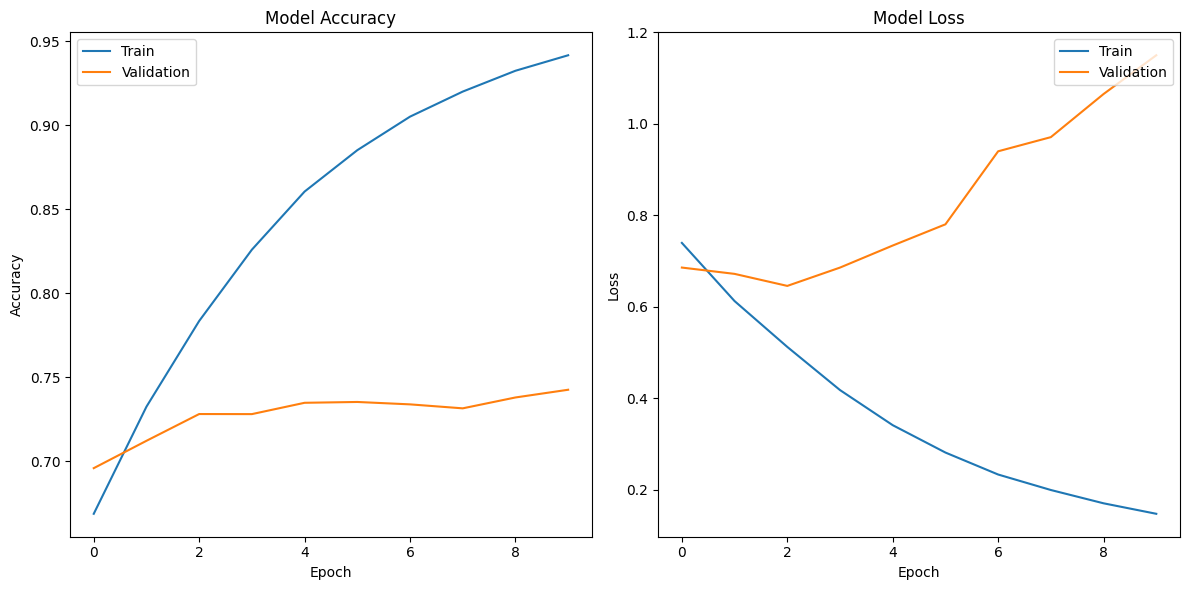

In [ ]:
#Plot Model Accuracy and Model Loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

The WebMD plots are similar to those from drug.com. The left plot shows that training accuracy improves steadily to almost 95% by the 9th epoch, while validation accuracy increases more slowly, leveling off around 75%. The right plot indicates that training loss decreases consistently to 0.2, but validation loss initially drops and then rises to about 0.8. These trends suggest the model might be overfitting.

876/876 [==============================] - 108s 123ms/step - loss: 1.1524 - accuracy: 0.7367
Test Loss: 1.1524423360824585
Test Accuracy: 0.7367105484008789
876/876 [==============================] - 102s 116ms/step
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      5080
           1       0.54      0.54      0.54      6262
           2       0.83      0.88      0.85     16669

    accuracy                           0.74     28011
   macro avg       0.67      0.65      0.65     28011
weighted avg       0.73      0.74      0.73     28011

Accuracy of the Model: 73.7%


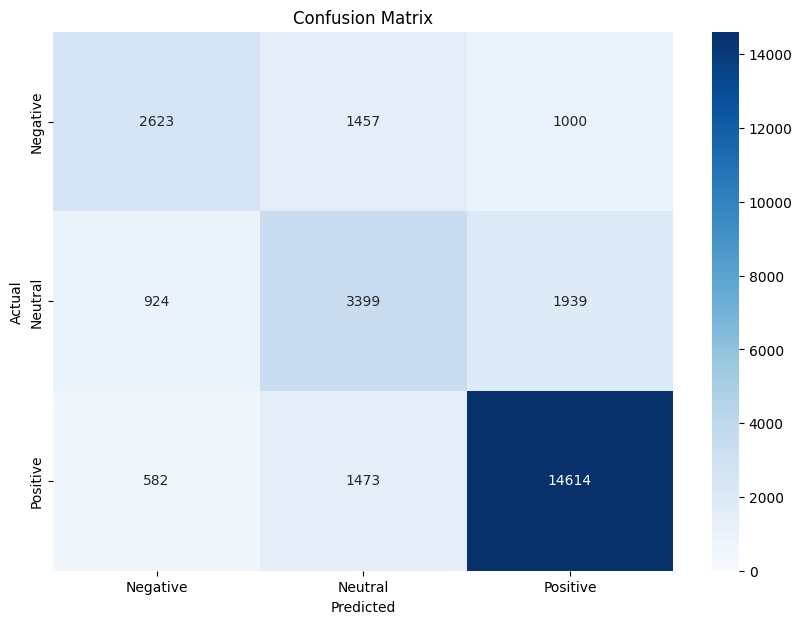

In [ ]:
# Output Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import pickle
from keras.models import load_model


# Map integer labels to class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Load the model history
with open("history_webmd_lstm.pkl", "rb") as file:
    history = pickle.load(file)

# Load the model model from architecture file
with open('model_architecture_webmd_lstm.json', 'r') as f:
      model = model_from_json(f.read())

# Load the model weights
model.load_weights('model_weights_webmd_lstm.h5')
class_weight_dict = model.weights

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot classification report
print(classification_report(y_test, y_pred_classes))

# Print accuracy
print("Accuracy of the Model: {:.1f}%".format(accuracy_score(y_test, y_pred_classes) * 100))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 The model has a test loss of 1.1524 and an accuracy of 73.67%. It performs best on class 2, with a precision of 83%, recall of 88%, and an F1-score of 85%. Overall, the model's accuracy is 74%. The confusion matrix visually breaks down how well the model predicts each class. It shows the number of times the model correctly or incorrectly predicted negative, neutral, and positive classes. The darkest area in the matrix shows that the model most accurately predicts positive cases, with 14,614 correct predictions, but it has more errors in predicting neutral and negative cases.

In [ ]:
# Testing the model on text reviews

def predict_sentiment(text):
    cleaned_text = tokenizer.texts_to_sequences([preprocess_text(text)])
    maxlen = max(len(seq) for seq in X_sequences)
    padded_text = pad_sequences(cleaned_text, maxlen=maxlen, padding='post')
    probabilities = model.predict(padded_text)[0]  # Get class probabilities
    predicted_class = np.argmax(probabilities)  # Get the index of the class with the highest probability
    if predicted_class == 0:
        return "Negative"
    elif predicted_class == 1:
        return "Neutral"
    else:
        return "Positive"

# Test the function
print(predict_sentiment("The drug is expensive but it is worth every cent."))
print(predict_sentiment("The drug is cheap but it doesn't perform well."))
print(predict_sentiment("The drug gives me horrible side effects, do not take it."))

1/1 [==============================] - 0s 65ms/step
Positive
1/1 [==============================] - 0s 65ms/step
Positive
1/1 [==============================] - 0s 65ms/step
Negative


##Cross-Data Sentiment Analysis

In our analysis, we streamline both datasets by dropping unnecessary columns and renaming the remaining ones. We utilize linear regression to create a cross-data model in two cases. In Case 1, we compare the Drug.com train set with the WebMD test set and the Linear Regression (LR) model predictions, achieving a train accuracy of 99.99%, test accuracy of 84.08%, RMSE score of 0.307, and Cohen's Kappa score of 0.392. Despite the model overfitting the train set, the test accuracy was higher compared to in-domain sentiment analysis, and the Kappa score exceeds the document reference. The graph shows significant fluctuations in both the WebMD test set (blue line) and the LR model predictions (orange line), indicating high variability in ratings and facilitating the assessment of the model's alignment with actual test ratings.

 In Case 2, we compare the Drug.com test set with the WebMD train set and the LR model predictions. The graph similarly highlights considerable fluctuations, and the performance metrics are consistent with Case 1, underscoring the model's predictive performance and variability.

## Drugs.com Train set vs Webmd test set using Linear Regression

In [ ]:
df_drugs_train1 = df_drugs_train.drop(['Unnamed: 0','date','new_review',], axis=1)
df_drugs_train1 = df_drugs_train1.rename(columns={'drugName': 'drug',
                                                  'rating_binary': 'rate',
                                                  'SideRating_binary': 'side',
                                                  'SideRating': 'siderating',
                                                  'usefulCount': 'usefulcount',
                                                 })
df_drugs_train1.head(5)

drug                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  usefulcount  \
0  "It has no side effect, I take it in combinati...     9.0           27   
1  "My son is halfway through his fourth week of ...     8.0          192   
2  "I used to take another oral contraceptive, wh...     5.0           17   
3  "This is my first time using any form of birth...     8.0           10   
4  "Suboxone has completely turned my life around...     9.0           37   

   rate  siderating  side  
0     2           0     0  
1     2           0     0  
2     1           0     0  
3     2           2     1  
4     2           1     1

In [ ]:
df_drugs_test1 = df_drugs_test.drop(['Unnamed: 0','date','new_review',], axis=1)
df_drugs_test1 = df_drugs_train1.rename(columns={'drugName': 'drug',
                                                  'rating_binary': 'rate',
                                                  'SideRating_binary': 'side',
                                                  'SideRating': 'siderating',
                                                  'usefulCount': 'usefulcount',
                                                 })
df_drugs_test1.head(5)

drug                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  usefulcount  \
0  "It has no side effect, I take it in combinati...     9.0           27   
1  "My son is halfway through his fourth week of ...     8.0          192   
2  "I used to take another oral contraceptive, wh...     5.0           17   
3  "This is my first time using any form of birth...     8.0           10   
4  "Suboxone has completely turned my life around...     9.0           37   

   rate  siderating  side  
0     2           0     0  
1     2           0     0  
2     1           0     0  
3     2           2     1  
4     2           1     1

In [ ]:
df_webmd1 = df_webmd.drop(['Age','Date','DrugId','EaseofUse','Effectiveness',
                                       'Satisfaction','Sex','New_Sides','New_Reviews','Sides'], axis=1)
df_webmd1 = df_webmd1.rename(columns={'Drug': 'drug',
                                                  'Condition': 'condition',
                                                  'Reviews': 'review',
                                                  'overall_rating_binary': 'rate',
                                                  'SideRating_binary': 'side',
                                                  'UsefulCount': 'usefulcount',
                                                  'overall_rating': 'rating',
                                                  'SideRating': 'siderating',
                                                 })
df_webmd1.head(5)

condition                                     drug  \
0                    Stuffy Nose                             25dph-7.5peh   
1                  Cold Symptoms                             25dph-7.5peh   
2                  Birth Control                                wymzya fe   
3  Disease of Ovaries with Cysts                                wymzya fe   
4                    Stuffy Nose  12 hour nasal relief spray, non-aerosol   

                                              review  usefulcount  rating  \
0  I'm a retired physician and of all the meds I ...            0    10.0   
1  cleared me right up even with my throat hurtin...            1    10.0   
2  Haven't gotten pregnant so it does it's job. I...            0     7.0   
3  I have take this for 5 years age 45-50 to prev...            0    10.0   
4   The 12 hour spray only works for me for 6 hours.            0     6.0   

   rate  siderating  side  
0     2           1     1  
1     2           0     0  
2     2           0     0  
3     2           0     0  
4     1           0     0

In [ ]:
# Check the data types of each column
data_types = df_webmd1.dtypes

# Separate continuous and categorical features
numeric_features = []
test = []
categorical_features = []

for column, dtype in data_types.items ():
    if dtype == 'string':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

# Print
print("numeric_features:")
print(numeric_features)
print("\nCategorical Features:")
print(categorical_features)

numeric_features:
['usefulcount', 'rating', 'rate', 'siderating', 'side']

Categorical Features:
['condition', 'drug', 'review']


In [ ]:
#determine the classification
numeric_features = ['usefulcount', 'rating', 'siderating', 'side']
categorical_features = ['condition', 'drug', 'review']

#pick the test and train set
X_df_drugs_train1 = df_drugs_train1.drop(columns = [ "rate" ], axis=1)
y_df_drugs_train1 = df_drugs_train1["rate"].copy()

X_df_drugs_test1 = df_drugs_test1.drop(columns = [ "rate" ], axis=1)
y_df_drugs_test1 = df_drugs_test1["rate"].copy()

X_webmd1 = df_webmd1.drop(columns = [ "rate" ], axis=1)
y_webmd1 = df_webmd1["rate"].copy()
X_train_webmd1, X_test_webmd1, y_train_webmd1, y_test_webmd1 = train_test_split(X_webmd1, y_webmd1, random_state=0, test_size=0.25)

print('Drug.com: Train set and Test set shape')
print(X_df_drugs_train1.shape)
print(X_df_drugs_test1.shape)
print(y_df_drugs_train1.shape)
print(y_df_drugs_test1.shape)
print('WEbmd: Train set and Test set shape')
print(X_train_webmd1.shape)
print(X_test_webmd1.shape)
print(y_train_webmd1.shape)
print(y_test_webmd1.shape)


Drug.com: Train set and Test set shape
(160398, 7)
(160398, 7)
(160398,)
(160398,)
WEbmd: Train set and Test set shape
(181545, 7)
(60515, 7)
(181545,)
(60515,)


In [ ]:
#transform column from numerical and category by scaler and onehotendcoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Train Accuracy: 0.9999794206078206
Test Accuracy: 0.8407716097901142
RMSE score: 0.30704963506727484
Cohen's Kappa Score: 0.39191695011160343


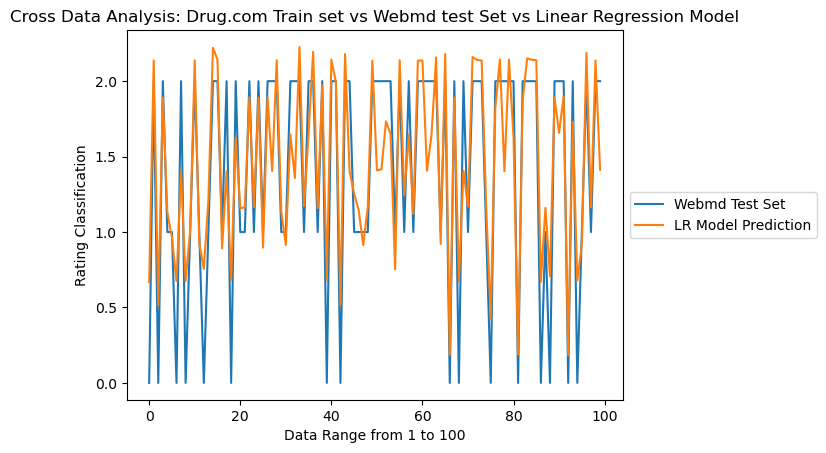

In [ ]:
# Develop the model by linear regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', LinearRegression())])
# develop the model based on train set
model_pipeline.fit(X_df_drugs_train1, y_df_drugs_train1)

# calculate the accuracy of Drug train set
train_accuracy = model_pipeline.score(X_df_drugs_train1, y_df_drugs_train1)

# calculate the accuracy of Webmd test set
test_accuracy = model_pipeline.score(X_test_webmd1, y_test_webmd1)

# develop the prediction based on Webmd test set
Y_predict_drug1 = model_pipeline.predict(X_test_webmd1)

# calculate Root Mean Square Error that indicate the average difference between values predicted by a model and the actual values
rmse = sqrt(mean_squared_error(y_test_webmd1, Y_predict_drug1))

kappa = cohen_kappa_score(y_test_webmd1.transpose().tolist(), list(map(lambda x: int(x), Y_predict_drug1.transpose().tolist())))
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("RMSE score:", rmse)
print("Cohen's Kappa Score:", kappa)


plt.plot(range(100), y_test_webmd1[:100], label = "Webmd Test Set")
plt.plot(range(100), Y_predict_drug1[:100], label = "LR Model Prediction")
plt.title('Cross Data Analysis: Drug.com Train set vs Webmd test Set vs Linear Regression Model')
plt.xlabel('Data Range from 1 to 100')
plt.ylabel('Rating Classification')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Webmd train set vs Drugs.com test set using Linear Regression

Train Accuracy: 0.9996778461052529
Test Accuracy: 0.8327803661102803
RMSE score: 0.35160444381235134
Cohen's Kappa Score: 0.39005977211381904


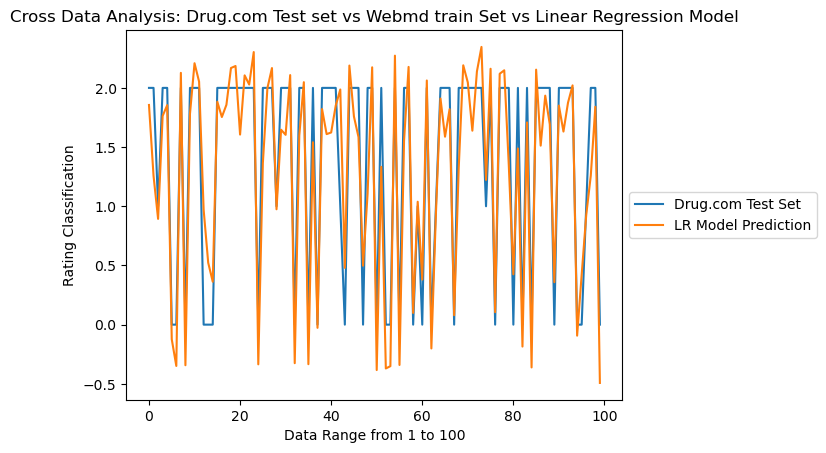

In [ ]:
# Develop the model by linear regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', LinearRegression())])
# develop the model based on Webmd train set
model_pipeline.fit(X_train_webmd1, y_train_webmd1)

# calculate the accuracy of Webmd train set
train_accuracy = model_pipeline.score(X_train_webmd1, y_train_webmd1)

# calculate the accuracy of Drug test set
test_accuracy = model_pipeline.score(X_df_drugs_test1, y_df_drugs_test1)

# develop the prediction based on test set
Y_predict_drug1 = model_pipeline.predict(X_df_drugs_test1)

# calculate Root Mean Square Error that indicate the average difference between values predicted by a model and the actual values
rmse = sqrt(mean_squared_error(y_df_drugs_test1, Y_predict_drug1))

kappa = cohen_kappa_score(y_df_drugs_test1.transpose().tolist(), list(map(lambda x: int(x), Y_predict_drug1.transpose().tolist())))
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("RMSE score:", rmse)
print("Cohen's Kappa Score:", kappa)


plt.plot(range(100), y_df_drugs_test1[:100], label = "Drug.com Test Set")
plt.plot(range(100), Y_predict_drug1[:100], label = "LR Model Prediction")
plt.title('Cross Data Analysis: Drug.com Test set vs Webmd train Set vs Linear Regression Model')
plt.xlabel('Data Range from 1 to 100')
plt.ylabel('Rating Classification')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##Results

**In-domain Sentiment Analysis**

### Graber et al, 2018 Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning

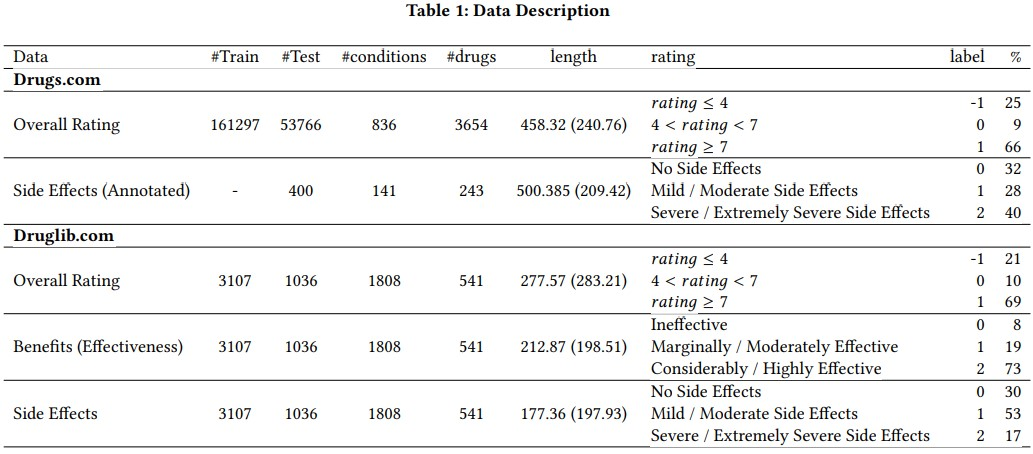

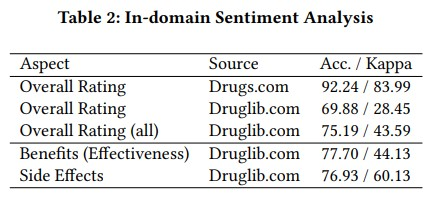

In [ ]:
# Original Paper Results for Comparison with our Models

from IPython.display import Image, display, Markdown

# Provide the path to the image file in your Google Drive
image_path = './Graber_paper_table1.jpg'
image_path2 = './Graber_paper_table2.jpg'

# Display the image
Image(filename=image_path)
Image(filename=image_path2)

# Display the title using Markdown
display(Markdown('### Graber et al, 2018 Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning'))

# Display the image
display(Image(filename=image_path))
display(Image(filename=image_path2))

The table presents a comprehensive overview of the training and testing data, along with the performance metrics of various models employed.

| Data         | #Train | #Test | #conditions | #drugs | rating            | label              | %   | Model Type         | Accuracy | Kappa | Loss | Precision | Recall | F1  | RMSE |
|--------------|--------|-------|-------------|--------|-------------------|--------------------|-----|--------------------|----------|-------|------|-----------|--------|-----|------|
| Drugs.com    |        |       |             |        |                   |                    |     |                    |          |       |      |           |        |     |      |
| Overall Rating | 160398 | 53471 | 883         | 3429   | rating <= 4       | 0                  | 25   | Logistic Regression | 91.58    | 82.79 | ---  | 91        | 92     | 91  | ---  |
|               |        |       |             |        | 4 < rating < 7    | 1                  | 9  | RNN GRU            | 83.3     | ---   | 0.48 | 87        | 83     | 85  | ---  |
|               |        |       |             |        | rating >= 7       | 2                  | 66  | RNN LSTM           | 87.2     | ---   | 0.59 | ---       | ---    | --- | ---  |
|               |        |       |             |        |                   |                    |     |                    |          |       |      |           |        |     |      |
| Side Effects | 160398 | 53471 | 883         | 3429   | No side effects   | 0                  | 44  | Linear Regression  | 65.6     | 35.7  | ---  | ---       | ---    | --- | 0.42 |
|               |        |       |             |        | Mild/Moderate     | 1                  | 40  |                    |          |       |      |           |        |     |      |
|               |        |       |             |        | Severe/Extremely Severe | 2             | 16  |                    |          |       |      |           |        |     |      |
| Web MD       |        |       |             |        |                   |                    |     |                    |          |       |      |           |        |     |      |
| Overall Rating | 224087 | 56022 | 1584        | 5014   | rating <= 4       | 0                  | 18  | Logistic Regression | 75.44    | 56.58 | ---  | 76        | 75     | 75  | ---  |
|               |        |       |             |        | 4 < rating < 7    | 1                  | 22  | RNN GRU            | 70.5     | ---   | 1.02 | 74        | 70     | 72  | ---  |
|               |        |       |             |        | rating >= 7       | 2                  | 60  | RNN LSTM           | 73.7     | ---   | 1.15 | 73        | 74     | 73  | ---  |
|               |        |       |             |        |                   |                    |     |                    |          |       |      |           |        |     |      |
| Side Effects | 224087 | 56022 | 1584        | 5014   | No side effects   | 0                  | 54  | Linear Regression  | 41.12    | 24.86 | ---  | ---       | ---    | --- | 0.52 |
|               |        |       |             |        | Mild/Moderate     | 1                  | 35  |                    |          |       |      |           |        |     |      |
|               |        |       |             |        | Severe/Extremely Severe | 2             | 11  |                    |          |       |      |           |        |     |      |


In comparing the Gräßer et al data description/results tables with our table, the drugs.com train and test counts, # of conditions and # of drugs were all almost exactly the same. The accuracy and Kappa score for the paper for the overall rating was 92.24 / 83.99, wheras the accuracy and Kappa score for our model was 91.58 / 82.79, which are very comparable. The big differences lie in the Druglib.com vs Web MD datasets. The Druglib.com dataset had very low counts for train, test, # of conditions and # of drugs in comparison to web MD which had 6607% more total features (280109 vs 4143). The accuracy and Kappa score for the paper was 69.88 / 28.45 whereas the accuracy and Kappa score for our model was 75.44 / 56.58, signifying a much better score for our model in predicting positive, neutral, and negative sentiments based on overall drug ratings.

In comparing the side effects, the accuracy and Kappa score for the paper on Druglib.com data was 76.93 / 60.13 whereas the accuracy and Kappa score for our model on the Web MD data was 41.12 / 24.86, demonstrating that the paper had a more successful score in predicting sentiments on side effects. However, the paper didn't run the model on the drugs.com side effect data, whereas our model did and had an accuracy and Kappa score of 65.6 / 35.7.

Drugs.com Dataset:

Overall Rating:

*   Logistic Regression: Achieved a remarkable accuracy of 91.58%, with a Kappa score of 82.79, showcasing robust performance in predicting positive, neutral, and negative sentiments based on overall drug ratings.

*   RNN GRU: Demonstrated promising results with an accuracy of 83.3%, maintaining a balanced precision and recall ratio, although slightly lower compared to Logistic Regression.

*   RNN LSTM: Demonstrated better accuracy than GRU with an 87.2%, although had a slightly higher loss than GRU (0.59). We were unable to complete the classification report and confusion matrix for this model.

Side Effects:

*   Linear Regression: Displayed a moderate performance in identifying sentiment related to side effects, achieving an accuracy of 65.6% and a Kappa score of 35.7, indicating potential for improvement, particularly in distinguishing between different levels of side effect severity.

Web MD Dataset:

Overall Rating:

*   Logistic Regression: Demonstrated a commendable accuracy of 75.44%, indicating its efficacy in discerning overall rating sentiments, albeit with a lower Kappa score compared to the Drugs.com dataset.

*   RNN GRU: Achieved a slightly lower accuracy of 70.5%, but comparable precision, recall and F1 scores as Logistic Regression, suggesting the model was able to capture the hidden sentiments almost as well as the traditional NLP model.

*   RNN LSTM: Achieved a slightly higher accuracy of 73.7% than GRU, with a slightly higher total loss (1.15). The precision, recall and F1 were comparable to both Logistic Regression and GRU, suggesting the model was able to capture the hidden sentiments as well as the traditional NLP model.

Side Effects:

*   Linear Regression: Demonstrated a relatively lower accuracy of 41.12% in identifying sentiments related to side effects. This suggests the complexity in discerning sentiments associated with side effects requires further exploration and model refinement.

**Cross-Data Sentiment Analysis**

### Graber et al, 2018 Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning

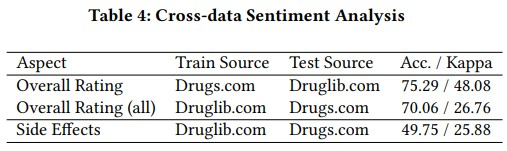

In [ ]:
# Original Paper Results for Comparison with our Models

from IPython.display import Image, display, Markdown

# Provide the path to the image file in your Google Drive
image_path = './Graber_paper_table4.jpg'

# Display the image
Image(filename=image_path)

# Display the title using Markdown
display(Markdown('### Graber et al, 2018 Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning'))

# Display the image
display(Image(filename=image_path))

| Aspect         | Train Source | Test Source | Accuracy | Kappa | RMSE |
|----------------|--------------|-------------|----------|-------|------|
| Side Effects  | Drugs.com   | Web MD      | 84       | 39.1  | 30.7 |
| Side Effects  | Web MD      | Drugs.com  | 83       | 39    | 35   |


Cross-Data Sentiment Analysis:

In comparing the Gräßer et al data results tables with our table, the accuracy and Kappa score for the paper in training the drugs.com dataset and testing it on the Druglib.com dataset was 49.75 / 25.88, whereas the accuracy and Kappa score for our model in training the drugs.com dataset and testing it on the Web MD dataset was 83 / 39, demonstrating our model had superior results in predicting sentiment across different data sources. Our model had similar scores when training on Web MD data and testing on drugs.com data, indicating robust performance in generalizing across datasets.

Drugs.com Model Tested on Web MD Data:

*   Accuracy: The model trained on Drugs.com data and tested on Web MD data achieved an accuracy of 84%. This indicates that the model performed well in identifying sentiments related to side effects, despite being trained on a different dataset.

*   Kappa Score: The Kappa score of 39.1 suggests substantial agreement beyond chance, further supporting the model's effectiveness in generalizing across datasets.

*   RMSE: With an RMSE of 30.7, the model exhibited relatively low error in predicting side effect sentiments on the Web MD dataset.

Web MD Model Tested on Drugs.com Data:

*   Accuracy: Similarly, the model trained on Web MD data and tested on Drugs.com data achieved a high accuracy of 83%, indicating robust performance in generalizing across datasets.

*   Kappa Score: The Kappa score of 39 underscores the model's ability to maintain agreement beyond chance when predicting side effect sentiments across different data sources.

*   RMSE: Despite being trained on a different dataset, the model demonstrated an RMSE of 35, indicating relatively low error in predicting side effect sentiments on the Drugs.com dataset.

##Discussion

The high accuracy achieved by Logistic Regression models across both datasets underscores the effectiveness of this traditional NLP approach in capturing overall sentiment trends. Our models either exceeded the Gräßer, et al paper or matched the accuracy and Kappa scores across the domain and data sources. It should be noted that the training accuracy was .99 suggesting the model was overfitted. We edited the parameters, including adding a balanced class weight to prevent class imbalance but it still remained overfitted before we ran out of time.

The performance of the deep learning models were almost as effective as the traditional models. When taking into account that these models were more computationally expensive than the traditional ones, the trade-off wasn't as high as we would have liked to have seen. This highlights the challenge of effectively capturing sequential dependencies in deep learning sentiment analysis tasks. Yet, with better pre-processing of the data, addressing the overfitting nature of the data and model refinement we believe the deep learning models could achieve better performance.

While the Linear Regression models performed moderately in identifying sentiments related to side effects, the relatively lower accuracy suggests the need for more sophisticated modeling techniques or feature engineering to better capture sentiments, particularly in distinguishing between different levels of side effect severity. It should also be noted that the training accuracy was .99 suggesting the model was overfitted. Again, we edited the parameters to reduce the overfitting but had no success in the limited time we had.

In summary, the findings of this study provide valuable insights into the effectiveness of various sentiment analysis models in discerning sentiments related to drug effectiveness, satisfaction and side effects within the healthcare domain. Further research is needed to explore advanced deep learning methodologies and refine model performance, ultimately contributing to more accurate and reliable sentiment analysis workflows for healthcare applications.

##Conclusion

This study used a comprehensive approach of sentiment analysis methodologies within the healthcare domain, focusing on both in-domain and cross-data analyses to evaluate the effectiveness of models in discerning sentiments related to drug effectiveness, satisfaction and side effects. Through  experimentation and analysis, several key findings have emerged, shaping our understanding of sentiment analysis applicability and efficacy in healthcare contexts.

For in-domain sentiment analysis, our analysis revealed the effectiveness of various models, including Logistic Regression and RNN GRU and LSTM, in categorizing sentiments based on drug ratings and side effects across datasets sourced from Drugs.com and Web MD. These models demonstrated somewhat high performance metrics, underscoring their potential utility in uncovering sentiments expressed within textual reviews of medications. Our models either exceeded the Gräßer, et al paper or matched the accuracy and Kappa scores across the in-domain and data sources, meaning we were successful at reproducing the paper's methods as well as further developing new methods by employing deep learning models.

Our review of cross-data sentiment analysis demonstrated promising results, displaying the generalizability of sentiment analysis models across different data sources. Models trained on one dataset demonstrated moderately high accuracy and agreement when tested on alternative datasets, indicating their adaptability and reliability in capturing sentiments related to drug side effects irrespective of data origin.

Overall, this study offers valuable insights into customer sentiments surrounding drug effectiveness, satisfaction and side effects. The findings presented here hold significant implications for healthcare organizations and decision-makers, providing a foundation for informed decision-making processes and enhancing understanding of patient experiences and perspectives.

##References

Gräßer, F., et al. “Drug Reviews (Drugs.com).” UCI Machine Learning Repository, 03 10 2018, https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com. Accessed 4 June 2024.

Gräßer, F., et al. “Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning.” Digital Health, vol. 18, no. 1, 2018, pp. 1-5. Data Summarization, https://kdd.cs.ksu.edu/Publications/Student/kallumadi2018aspect.pdf. Accessed 1 May 2024.

Luay, Muhammad. “Sentiment Analysis using Recurrent Neural Network(RNN),Long Short Term Memory(LSTM) and….” Medium, 21 September 2023, https://medium.com/@muhammadluay45/sentiment-analysis-using-recurrent-neural-network-rnn-long-short-term-memory-lstm-and-38d6e670173f. Accessed 10 June 2024.

Pedamallu, Hemanth. “RNN vs GRU vs LSTM. In this post, I will make you go… | by Hemanth Pedamallu | Analytics Vidhya.” Medium, 14 November 2020, https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573. Accessed 11 June 2024.

Rohan, Harode. “WebMD Drug Reviews Dataset.” Kaggle, 01 06 2020, https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset. Accessed 4 June 2024.

Zargar, Sakib A. “Introduction to Sequence Learning Models: RNN, LSTM, GRU Sakib Ashraf Zargar Department of Mechanical and Aerospace Engineering.” ResearchGate, 2021, https://www.researchgate.net/profile/Sakib-Zargar-2/publication/350950396_Introduction_to_Sequence_Learning_Models_RNN_LSTM_GRU/links/607b41c0907dcf667ba83ade/Introduction-to-Sequence-Learning-Models-RNN-LSTM-GRU.pdf. Accessed 11 June 2024.